# Experimental data pipeline

### Imports

In [2]:
from bin.experimental_pipeline import DeciferPipeline
from bin.train import TrainConfig
from glob import glob
import os
import matplotlib.pyplot as plt

### Initialize DeciferPipeline and prepare target PXRD

In [3]:
pipeline = DeciferPipeline(
    model_path="../../deCIFer/experiments/model__conditioned_mlp_augmentation__context_3076__robust/ckpt.pt",
    zip_path="experimental_data.zip",
    results_output_folder="results_output",
)

### Protocols

1. Run 25 experiments with no information but the standardized PXRD
2. Run 25 experiments with restrictions on composition:
	test multiple multiplicities of the same composition
3. Run 25 experiments with chosen multiplicity and specific crystal system
4. Run 25 experiments with chosen multiplicity and specific space group

### Plotting from cluster

Data loaded from ../crystalline_Fe2O3_protocol_a100_500/AFS012d_a850C_protocol_Fe12O18.pkl


Finding best structure...:   0%|                                                                | 0/500 [00:00…

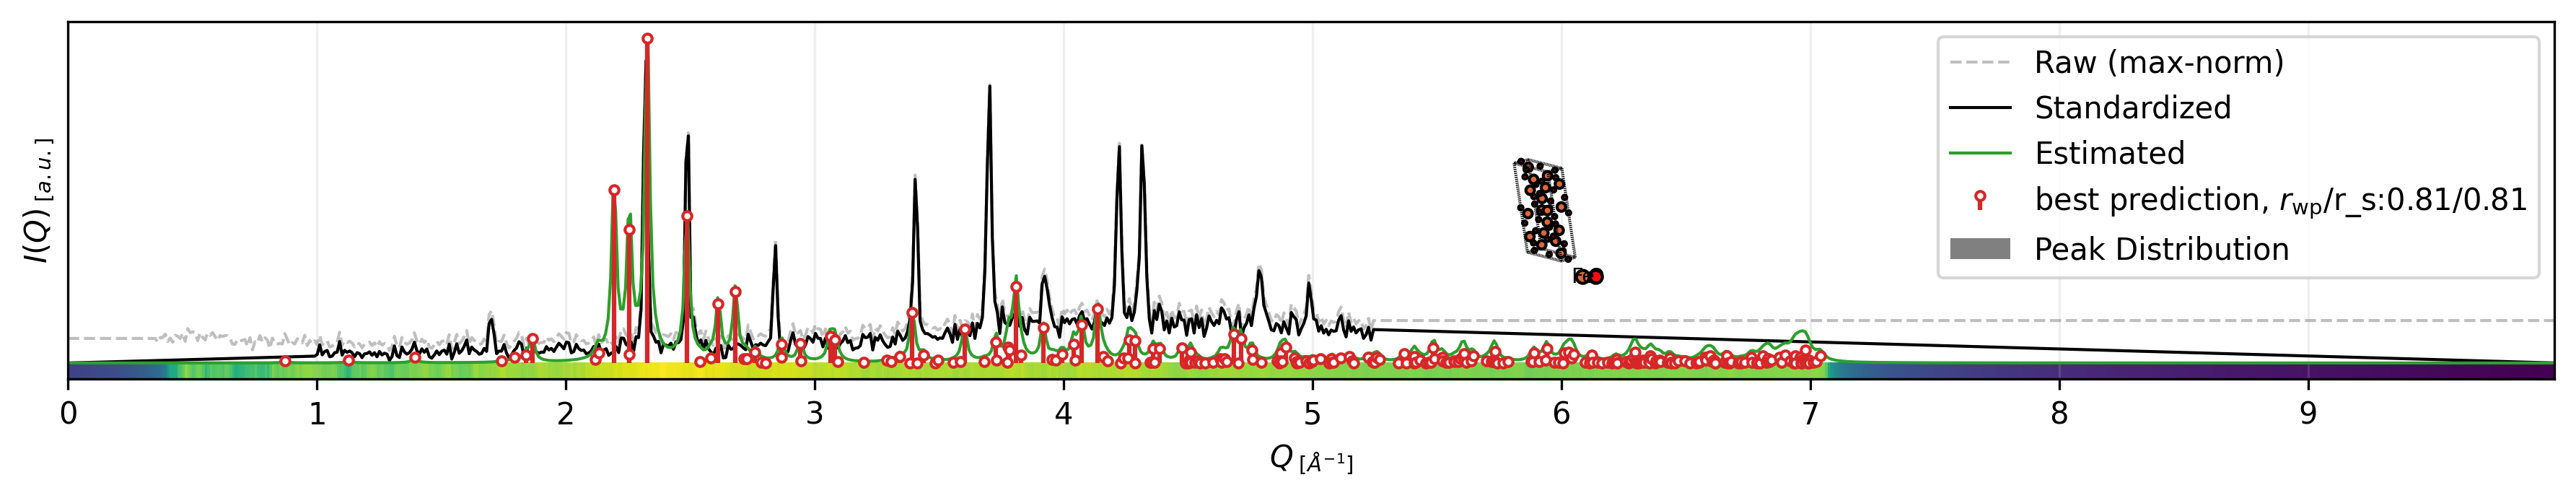

Data loaded from ../crystalline_Fe2O3_protocol_a100_500/AFS012d_a850C_protocol_Fe12O18_sg.pkl


Finding best structure...:   0%|                                                                | 0/500 [00:00…

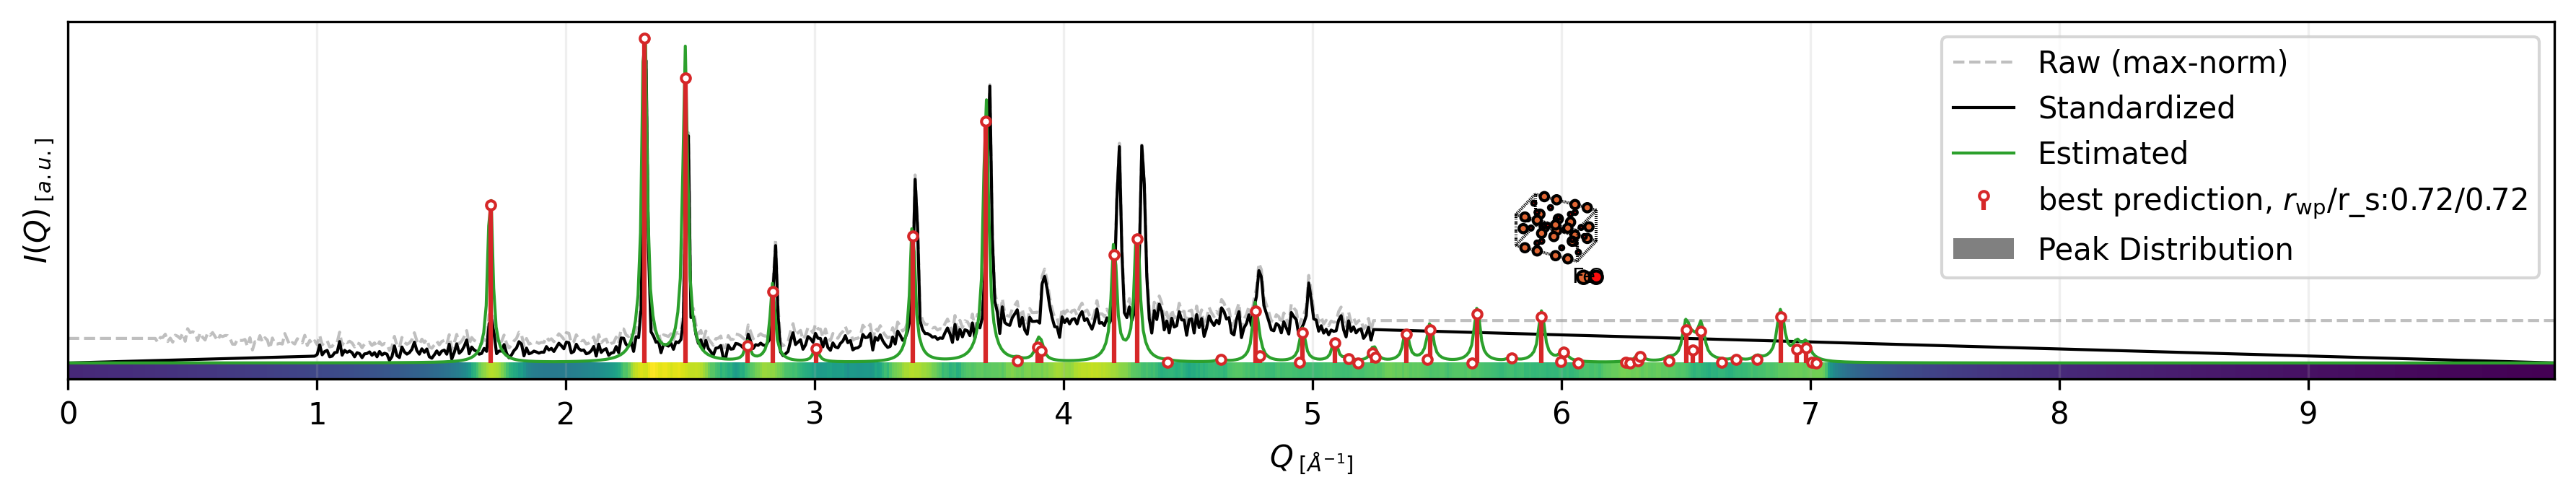

Data loaded from ../crystalline_Fe2O3_protocol_a100_500/AFS012d_a850C_protocol_Fe2xO3x_sg.pkl


Finding best structure...:   0%|                                                                 | 0/19 [00:00…

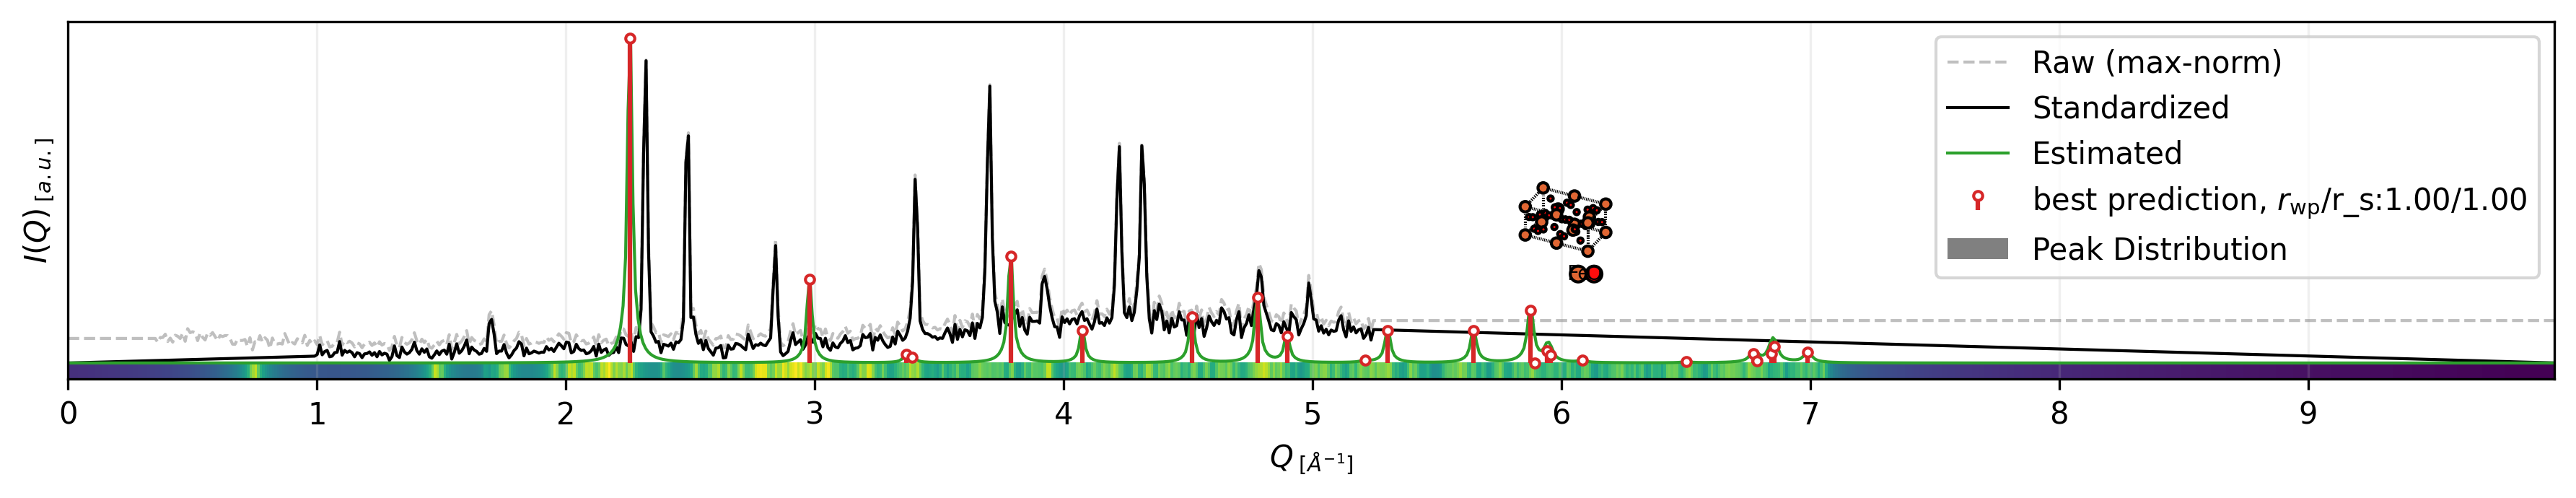

Data loaded from ../crystalline_Fe2O3_protocol_a100_500/AFS012d_a850C_protocol_Six.pkl


Finding best structure...:   0%|                                                                | 0/481 [00:00…

Here


TypeError: 'NoneType' object is not subscriptable

In [5]:
# Plotting induvidually
global_plotting_config = dict(
    size_estimate=100,
    base_fwhm=0.01,
    complexity_weight=0.00,
    atom_radii=0.5, 
    atom_offset=(0, 2, 0),
    atom_legend_radius=1.0,
    struc_offset_x=0.1,
    struc_offset_y=0.25,
    struc_scale_height=0.75,
    struc_axis_off=True,
    struc_add_axis_x = 6.0,
    figsize=(10*1.2,2*1.2),
    dpi=300,    
    show_estimation=True,
    show_second_best=False,
)


pipeline.setup_folder("../crystalline_Fe2O3_protocol_a100_500")
result_paths = sorted(glob(os.path.join(pipeline.results_output_folder, '*.pkl'))) if pipeline.results_output_folder is not None else []

for path in result_paths:
    pipeline.load_pickle(path)
    pipeline.plot_pxrd_and_structure(**global_plotting_config)

Data loaded from ../crystalline_Si_protocol_a100/Si_Mythen_protocol_Si1_cubic.pkl


Finding best structure...:   0%|                                                                 | 0/96 [00:00…

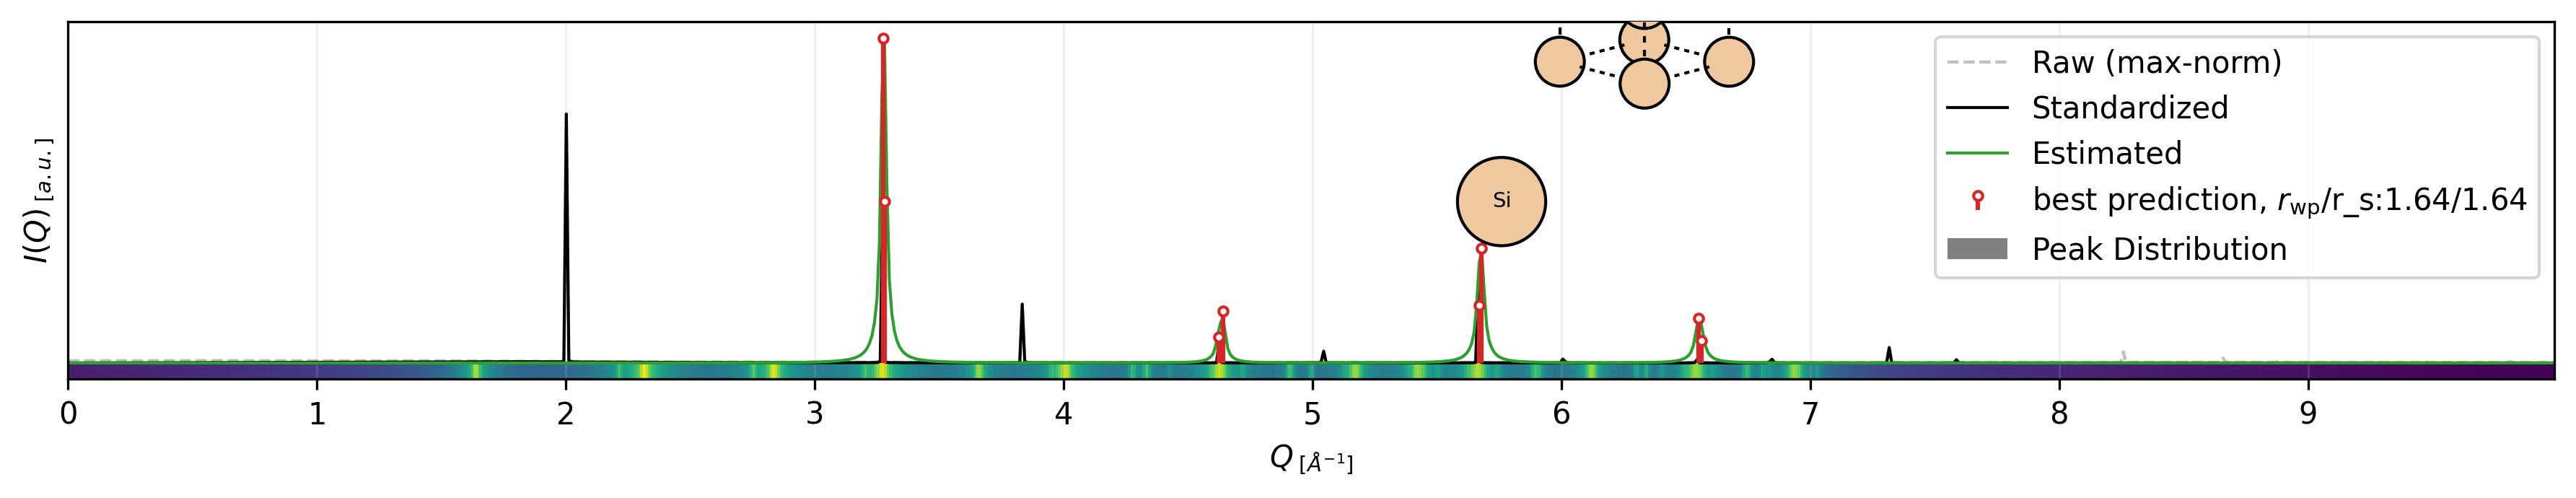

Data loaded from ../crystalline_Si_protocol_a100/Si_Mythen_protocol_Si8.pkl


Finding best structure...:   0%|                                                                | 0/100 [00:00…

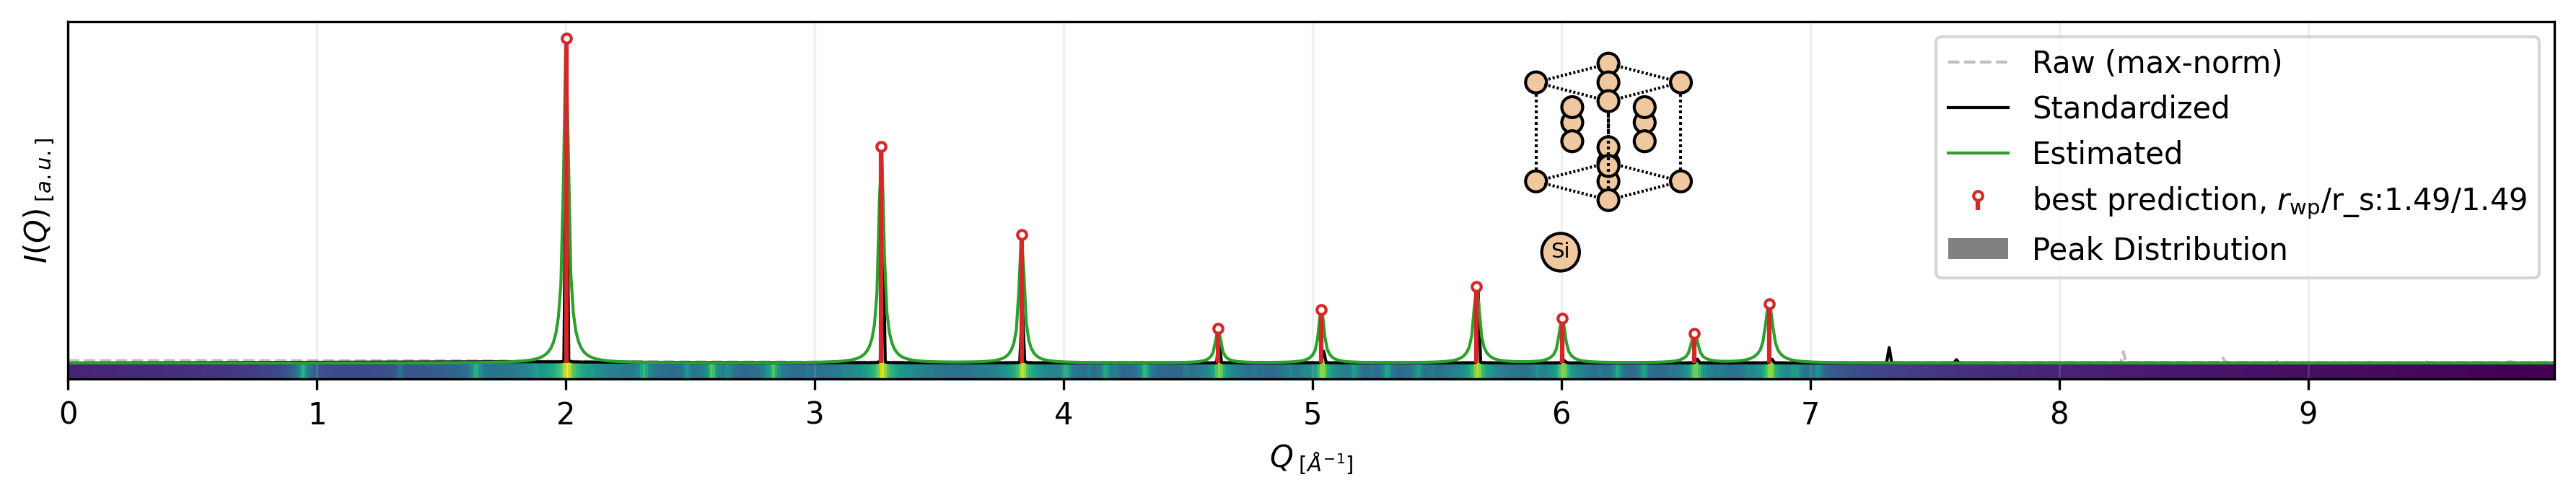

Data loaded from ../crystalline_Si_protocol_a100/Si_Mythen_protocol_Six.pkl


Finding best structure...:   0%|                                                                 | 0/90 [00:00…

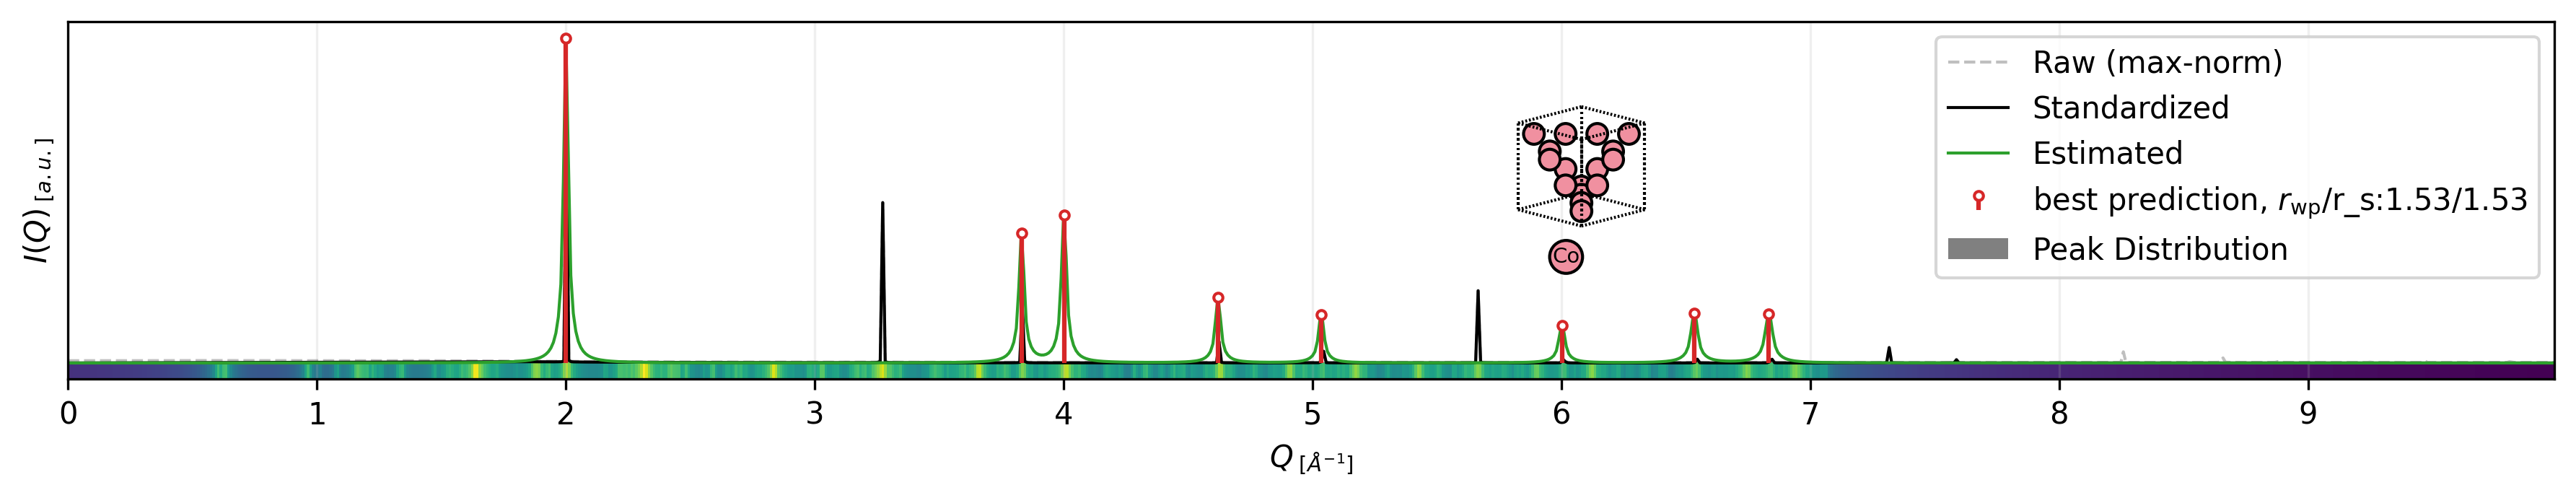

Data loaded from ../crystalline_Si_protocol_a100/Si_Mythen_protocol_Six_crystal.pkl


Finding best structure...:   0%|                                                                 | 0/83 [00:00…

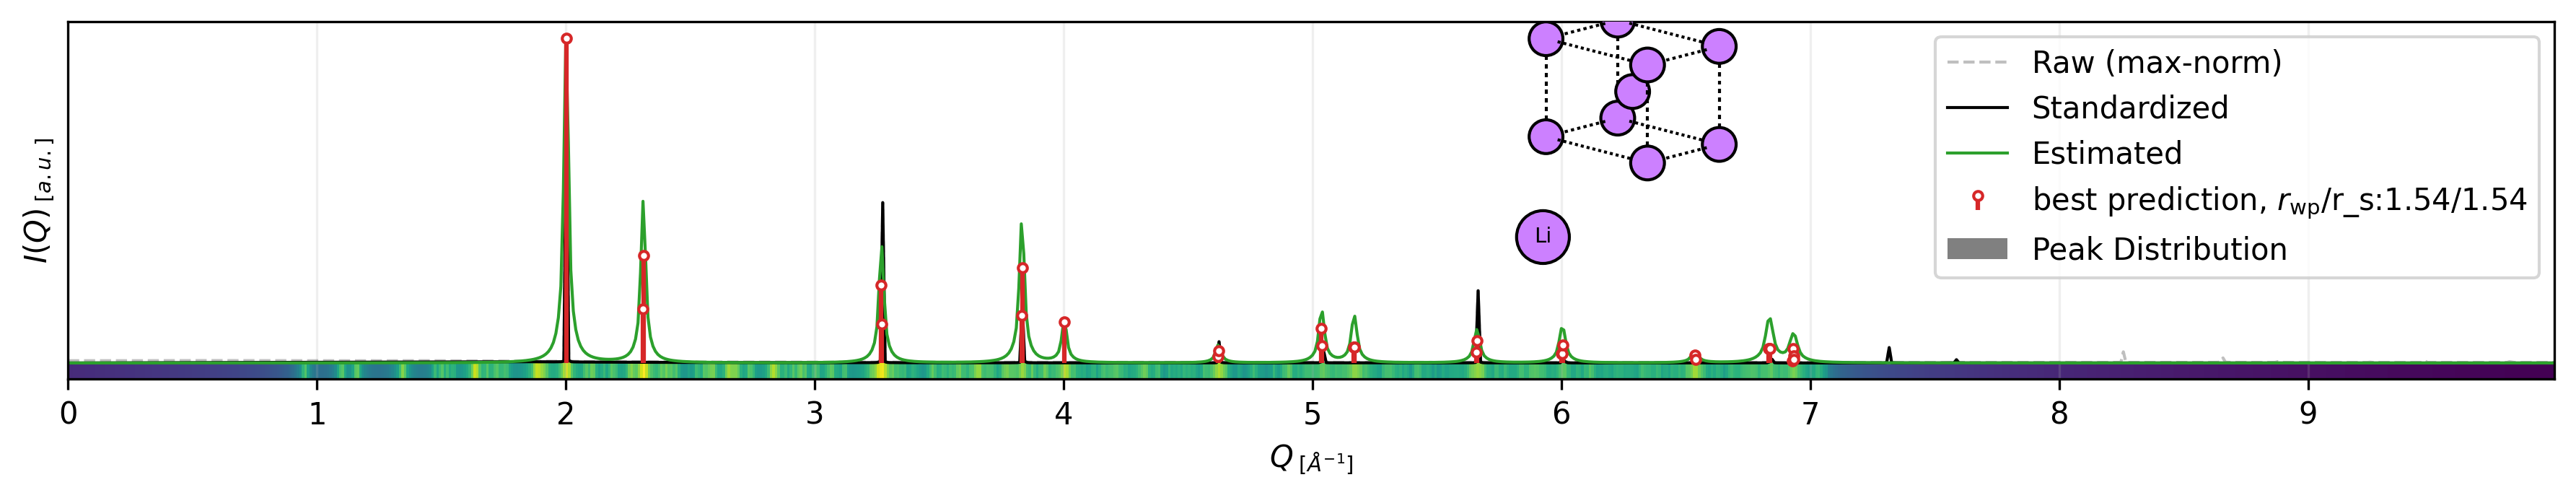

Data loaded from ../crystalline_Si_protocol_a100/Si_Mythen_protocol_none.pkl


Finding best structure...:   0%|                                                                 | 0/96 [00:00…

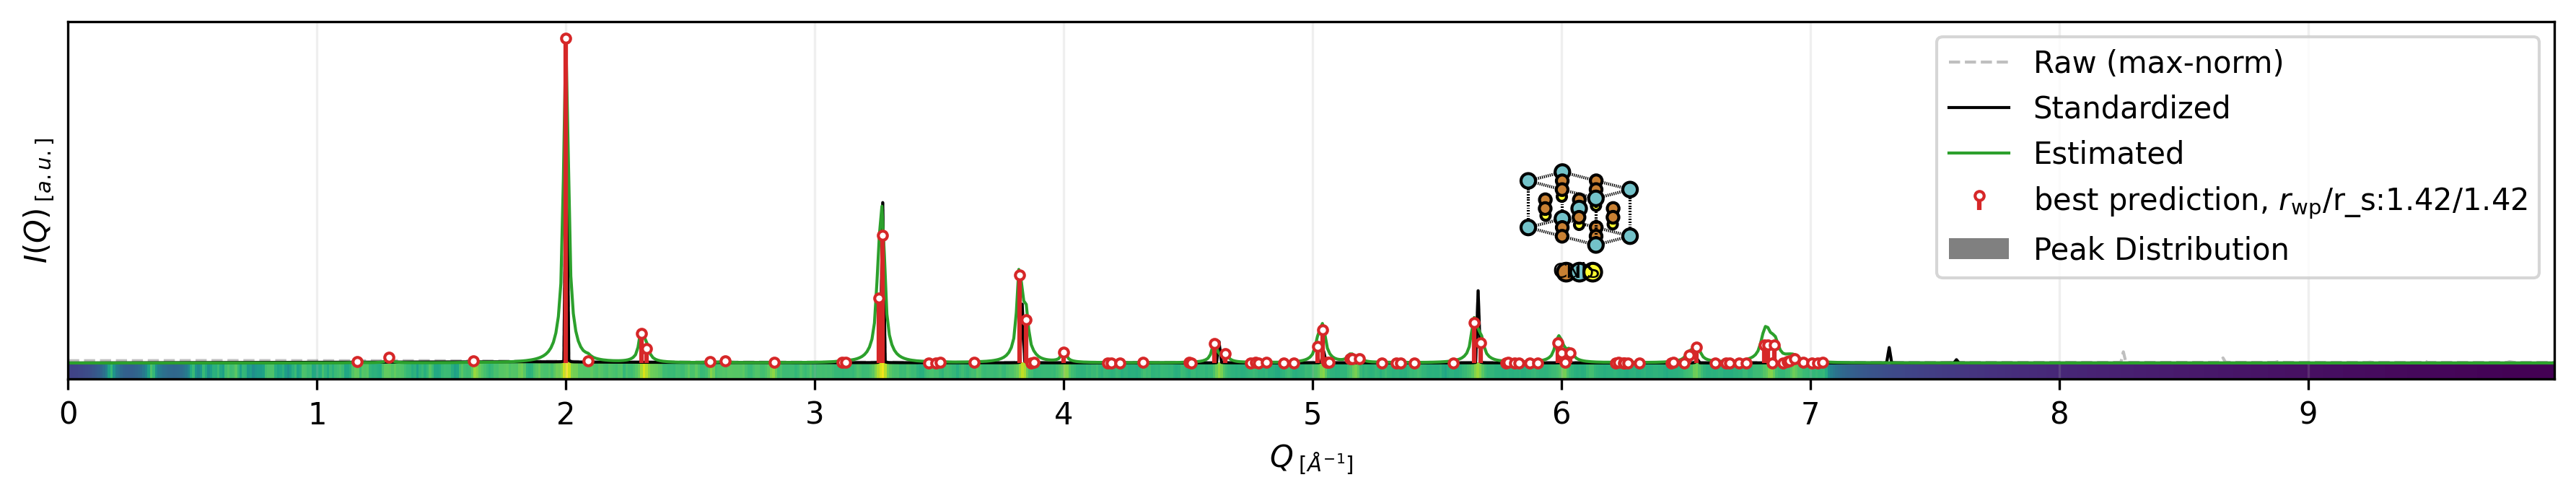

In [4]:
# Plotting induvidually
global_plotting_config = dict(
    size_estimate=100,
    base_fwhm=0.01,
    complexity_weight=0.00,
    atom_radii=0.5, 
    atom_offset=(0, 2, 0),
    atom_legend_radius=1.0,
    struc_offset_x=0.1,
    struc_offset_y=0.25,
    struc_scale_height=0.75,
    struc_axis_off=True,
    struc_add_axis_x = 6.0,
    figsize=(10*1.2,2*1.2),
    dpi=300,    
    show_estimation=True,
    show_second_best=False,
)


pipeline.setup_folder("../crystalline_Si_protocol_a100")
result_paths = sorted(glob(os.path.join(pipeline.results_output_folder, '*.pkl'))) if pipeline.results_output_folder is not None else []

for path in result_paths:
    pipeline.load_pickle(path)
    pipeline.plot_pxrd_and_structure(**global_plotting_config)

In [ ]:
# Plotting induvidually
global_plotting_config = dict(
    size_estimate=100,
    base_fwhm=0.01,
    complexity_weight=0.00,
    atom_radii=0.5, 
    atom_offset=(0, 2, 0),
    atom_legend_radius=1.0,
    struc_offset_x=0.1,
    struc_offset_y=0.25,
    struc_scale_height=0.75,
    struc_axis_off=True,
    struc_add_axis_x = 6.0,
    figsize=(10*1.2,2*1.2),
    dpi=300,    
    show_estimation=True,
    show_second_best=False,
)


pipeline.setup_folder("../crystalline_Si_protocol_a100")
result_paths = sorted(glob(os.path.join(pipeline.results_output_folder, '*.pkl'))) if pipeline.results_output_folder is not None else []

for path in result_paths:
    pipeline.load_pickle(path)
    pipeline.plot_pxrd_and_structure(**global_plotting_config)

In [24]:
result_paths = sorted(glob(os.path.join("../crystalline_CeO2_protocol_a100", '*.pkl'))) if pipeline.results_output_folder is not None else []

for path in result_paths:
    with open(result_paths, "rb") as f:
        data_loaded = pickle.load(f)
    self.results = data_loaded.get("results", None)
    self.exp_q = data_loaded.get("exp_q", None)
    self.exp_i = data_loaded.get("exp_i", None)
    self.raw_q = data_loaded.get("raw_q", None)
    self.raw_i = data_loaded.get("raw_i", None)
    self.prep_config = data_loaded.get("prep_config", None)
    print(f"Data loaded from {input_file}")


## Adrians data

In [38]:
pipeline.setup_folder("Adrian")

target_files = ["S1-100_1.xy"]
background_file = None

wavelength=1.5406
q_min_crop=1.8
q_max_crop=8.0
n_trials = 10
DEBUG_MAX = None
preview = False

protocols = [
    [{}, "none"]
    # [{"composition": "Ce4O8"}, "Ce4O8"],
]

for target_file in target_files[:DEBUG_MAX]:
    pipeline.prepare_target_data(
        target_file=target_file,
        background_file=background_file,
        wavelength=wavelength,
        q_min_crop=q_min_crop,
        q_max_crop=q_max_crop,
    )

    if preview:
        fig, ax = plt.subplots(figsize=(16,4))
        ax.plot(pipeline.exp_q, pipeline.exp_i)
        plt.show()
        break
    
    for i, (cfg, name) in enumerate(protocols, 1):
        pipeline.run_experiment_protocol(
            n_trials=n_trials,
            protocol_name=name,
            save_to=f"{target_file.split(".")[0]}_protocol_{name}.pkl", 
            **cfg
        )

Running trials for protocol none:   0%|                                                          | 0/10 [00:00…

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Data saved to Adrian/S1-100_1_protocol_none.pkl


Data loaded from Adrian/S1-050_1_protocol_Ce4O8.pkl


Finding best structure...:   0%|                                                                  | 0/1 [00:00…

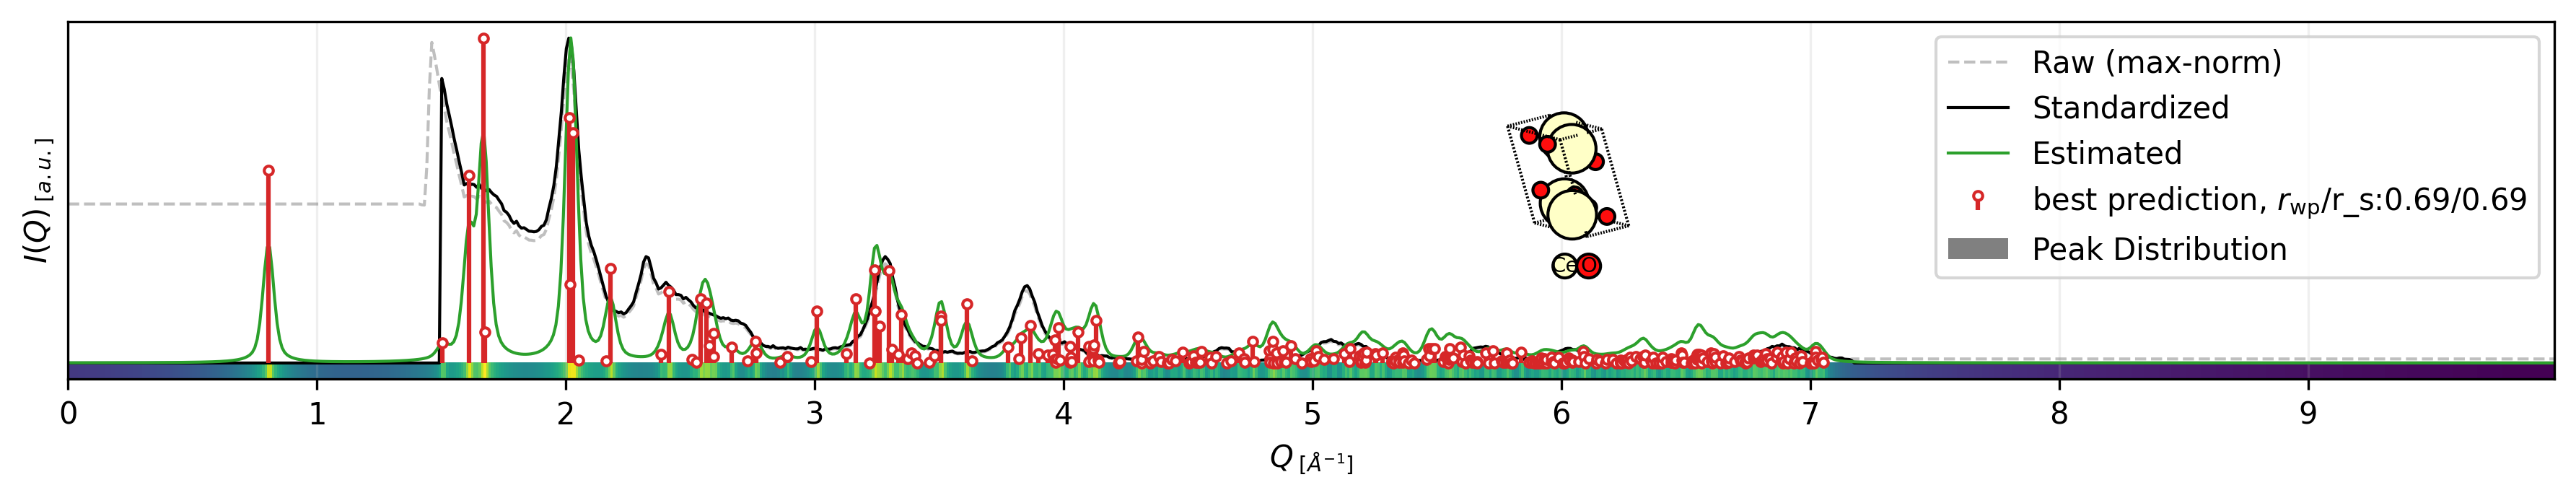

Data loaded from Adrian/S1-100_1_protocol_Ce4O8.pkl


Finding best structure...:   0%|                                                                  | 0/1 [00:00…

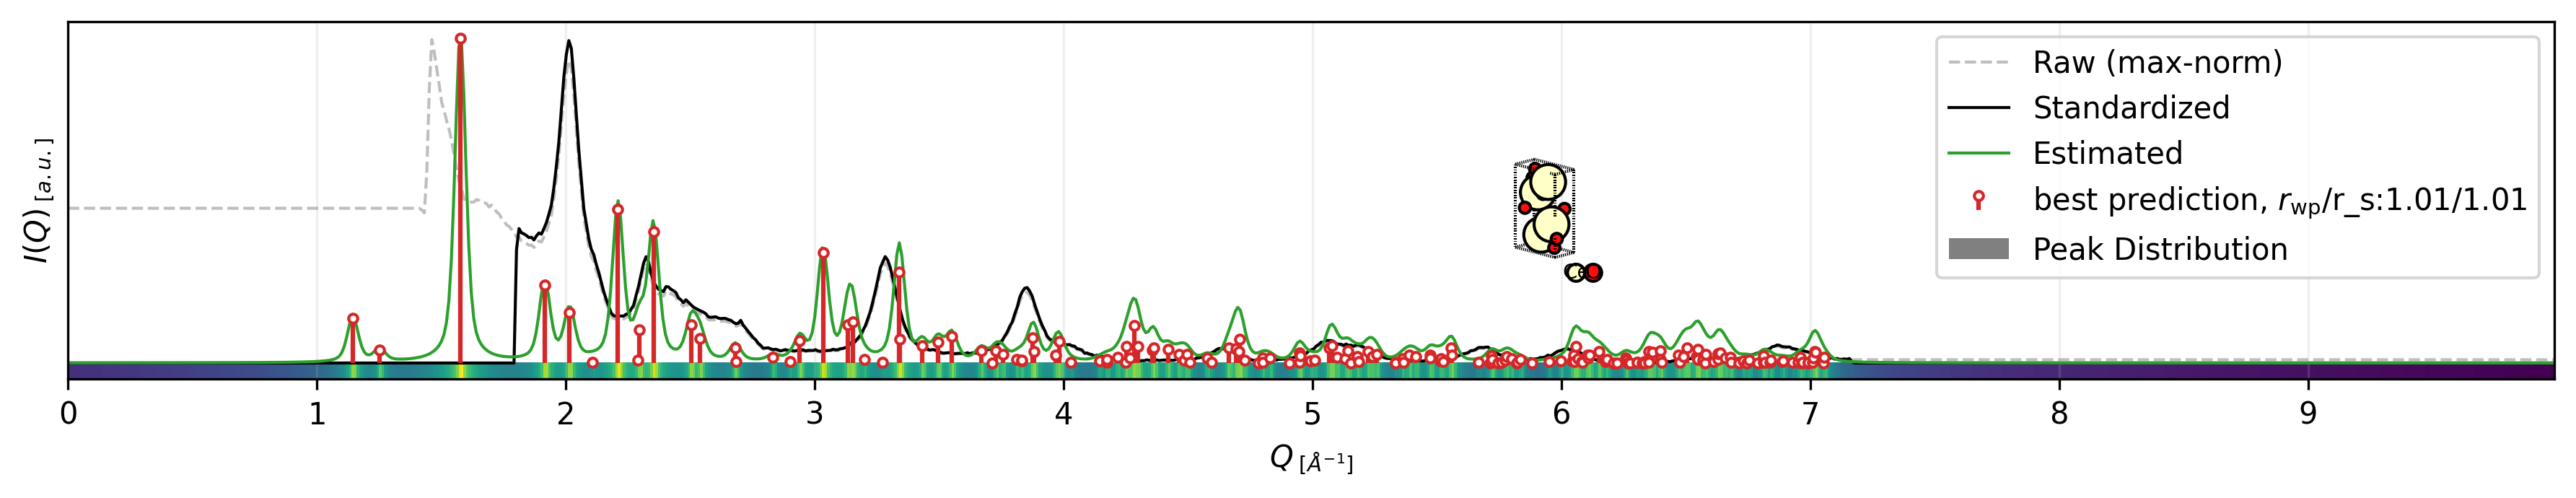

Data loaded from Adrian/S1-100_1_protocol_none.pkl


Finding best structure...:   0%|                                                                 | 0/10 [00:00…

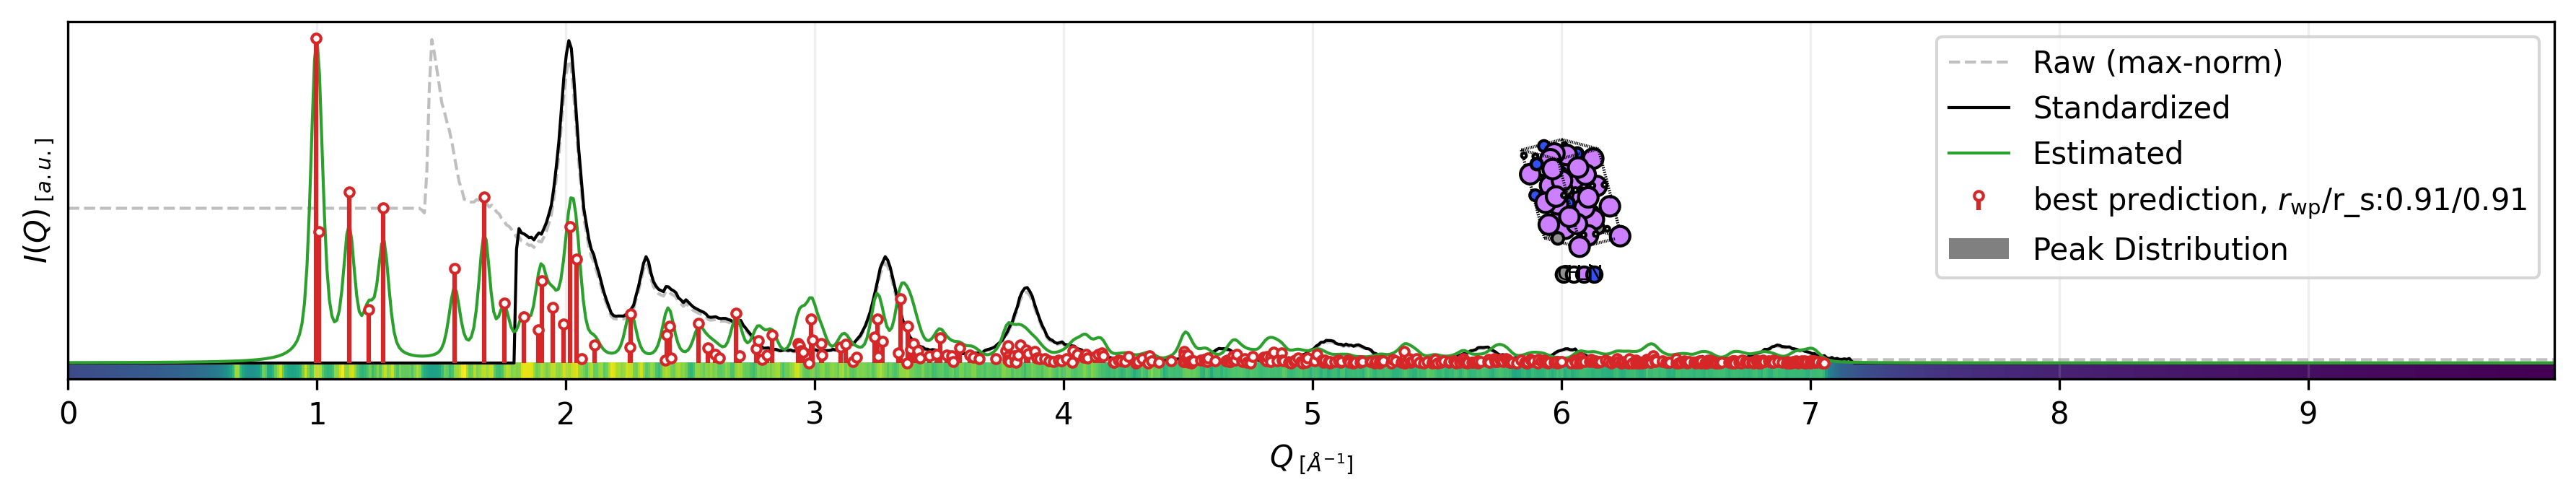

In [39]:
global_plotting_config = dict(
    size_estimate=380,
    base_fwhm=0.05,
    complexity_weight=0.00,
    atom_radii=1.0, 
    atom_offset=(0, 2, 0),
    atom_legend_radius=1.0,
    struc_offset_x=0.1,
    struc_offset_y=0.25,
    struc_scale_height=0.75,
    struc_axis_off=True,
    struc_add_axis_x = 6.0,
    figsize=(10*1.2,2*1.2),
    dpi=300,    
    show_estimation=True,
    show_second_best=False,
)
pipeline.setup_folder("Adrian")
result_paths = sorted(glob(os.path.join(pipeline.results_output_folder, '*.pkl'))) if pipeline.results_output_folder is not None else []

for path in result_paths:
    pipeline.load_pickle(path)
    pipeline.plot_pxrd_and_structure(**global_plotting_config)

## Crystalline

In [13]:
pipeline.setup_folder("crystalline_CeO2")

target_files = ["crystalline_CeO2_BM31.xye"]
background_file = None

wavelength=0.25448
q_min_crop=1.5
q_max_crop=8.0
n_trials = 50
DEBUG_MAX = None

protocols = [
    # [{}, "none"],
    [{"composition": "CexO2x", "composition_ranges": {"Ce": (1,4)}}, "CexO2x"],
    # [{"composition": "CexO2x", "composition_ranges": {"Ce": (1,4)}, "spacegroup": "Fm-3m_sg"}, "CexO2x_sg"],
]

for target_file in target_files[:DEBUG_MAX]:
    pipeline.prepare_target_data(
        target_file=target_file,
        background_file=background_file,
        wavelength=wavelength,
        q_min_crop=q_min_crop,
        q_max_crop=q_max_crop,
    )

    if False:
        fig, ax = plt.subplots()
        ax.plot(pipeline.exp_q, pipeline.exp_i)
        plt.show()
        break
    
    for i, (cfg, name) in enumerate(protocols, 1):
        pipeline.run_experiment_protocol(
            n_trials=n_trials,
            protocol_name=name,
            save_to=f"{target_file.split(".")[0]}_protocol_{name}.pkl", 
            **cfg
        )

Running trials for protocol CexO2x:   0%|                                                        | 0/50 [00:00…

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Data saved to crystalline_CeO2/crystalline_CeO2_BM31_protocol_CexO2x.pkl


Data loaded from crystalline_CeO2/crystalline_CeO2_BM31_protocol_CexO2x.pkl


Finding best structure...:   0%|                                                                 | 0/50 [00:00…

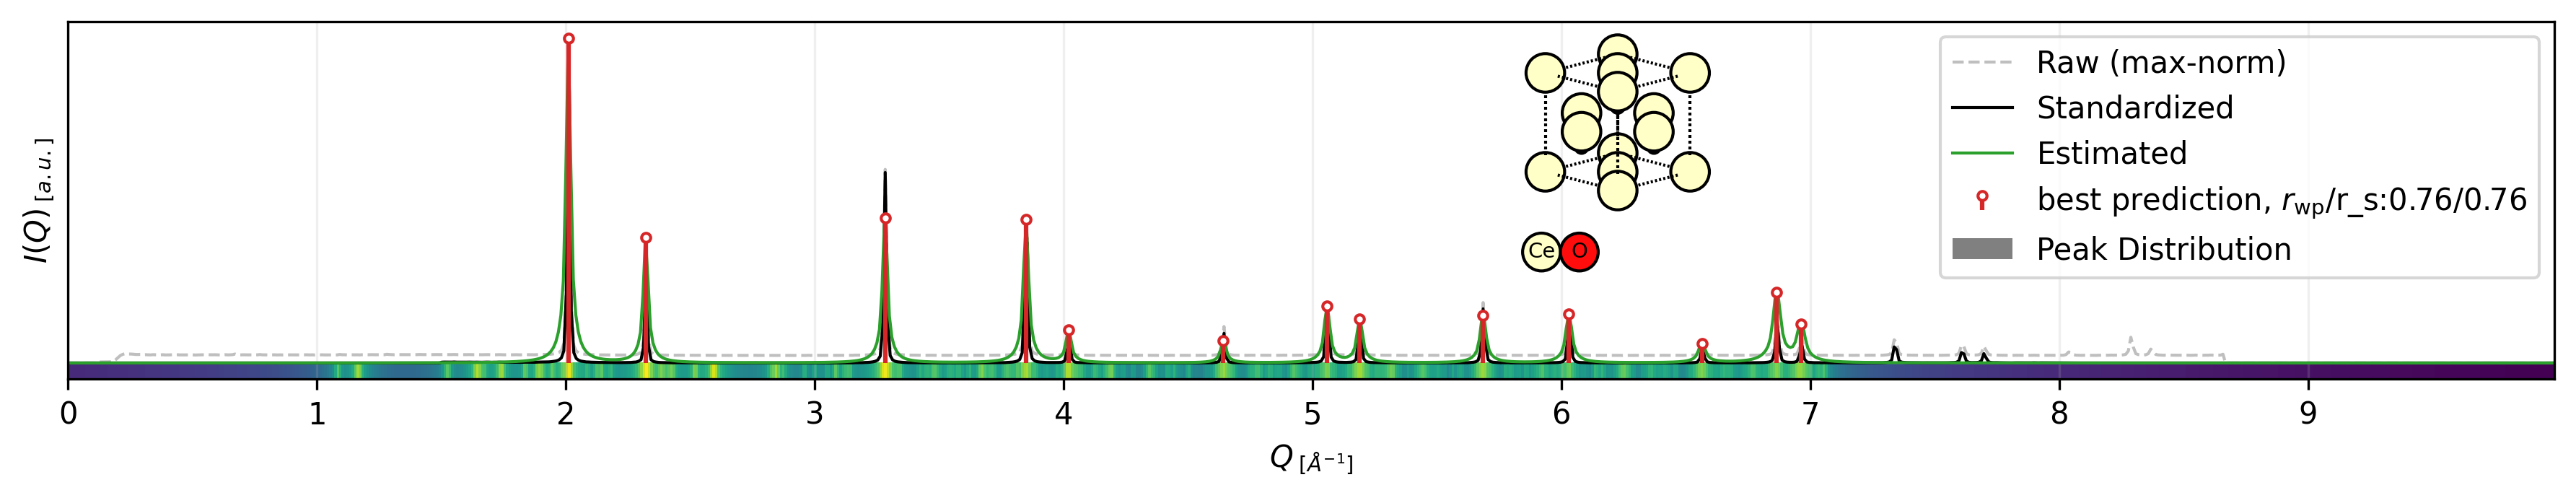

In [5]:
global_plotting_config = dict(
    size_estimate=100,
    base_fwhm=0.01,
    complexity_weight=0.00,
    atom_radii=0.5, 
    atom_offset=(0, 2, 0),
    atom_legend_radius=1.0,
    struc_offset_x=0.1,
    struc_offset_y=0.25,
    struc_scale_height=0.75,
    struc_axis_off=True,
    struc_add_axis_x = 6.0,
    figsize=(10*1.2,2*1.2),
    dpi=300,    
    show_estimation=True,
    show_second_best=False,
)
pipeline.setup_folder("crystalline_CeO2")
result_paths = sorted(glob(os.path.join(pipeline.results_output_folder, '*x.pkl'))) if pipeline.results_output_folder is not None else []

for path in result_paths:
    pipeline.load_pickle(path)
    pipeline.plot_pxrd_and_structure(**global_plotting_config)

In [5]:
pipeline.setup_folder("crystalline_Si")

target_files = ["scan-4693_mean.xy"]
background_file = None

wavelength=None
q_min_crop=1.7
q_max_crop=10.0
n_trials = 1
DEBUG_MAX = None

protocols = [
    # [{}, "none"],
    # [{"composition": "Six", "composition_ranges": {"Si": (1,4)}}, "Six"],
    # [{"composition": "Six", "composition_ranges": {"Si": (1,4)}, "crystal_systems": [4,5,6,7]}, "Six_crystal"],
    [{"composition": "Si1", "crystal_systems": [7]}, "Si1_cubic"],
]

for target_file in target_files[:DEBUG_MAX]:
    pipeline.prepare_target_data(
        target_file=target_file,
        background_file=background_file,
        wavelength=wavelength,
        q_min_crop=q_min_crop,
        q_max_crop=q_max_crop,
    )

    if False:
        fig, ax = plt.subplots()
        ax.plot(pipeline.exp_q, pipeline.exp_i)
        plt.show()
        break
    
    for cfg, name in protocols:
        pipeline.run_experiment_protocol(
            n_trials=n_trials,
            protocol_name=name,
            save_to=f"{target_file.split(".")[0]}_protocol_{name}.pkl",
            **cfg
        )

Running trials for protocol Si1_cubic:   0%|                                                      | 0/1 [00:00…

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Data saved to crystalline_Si/scan-4693_mean_protocol_Si1_cubic.pkl


Data loaded from crystalline_Si/scan-4693_mean_protocol_Si1_cubic.pkl


Finding best structure...:   0%|                                                                  | 0/1 [00:00…

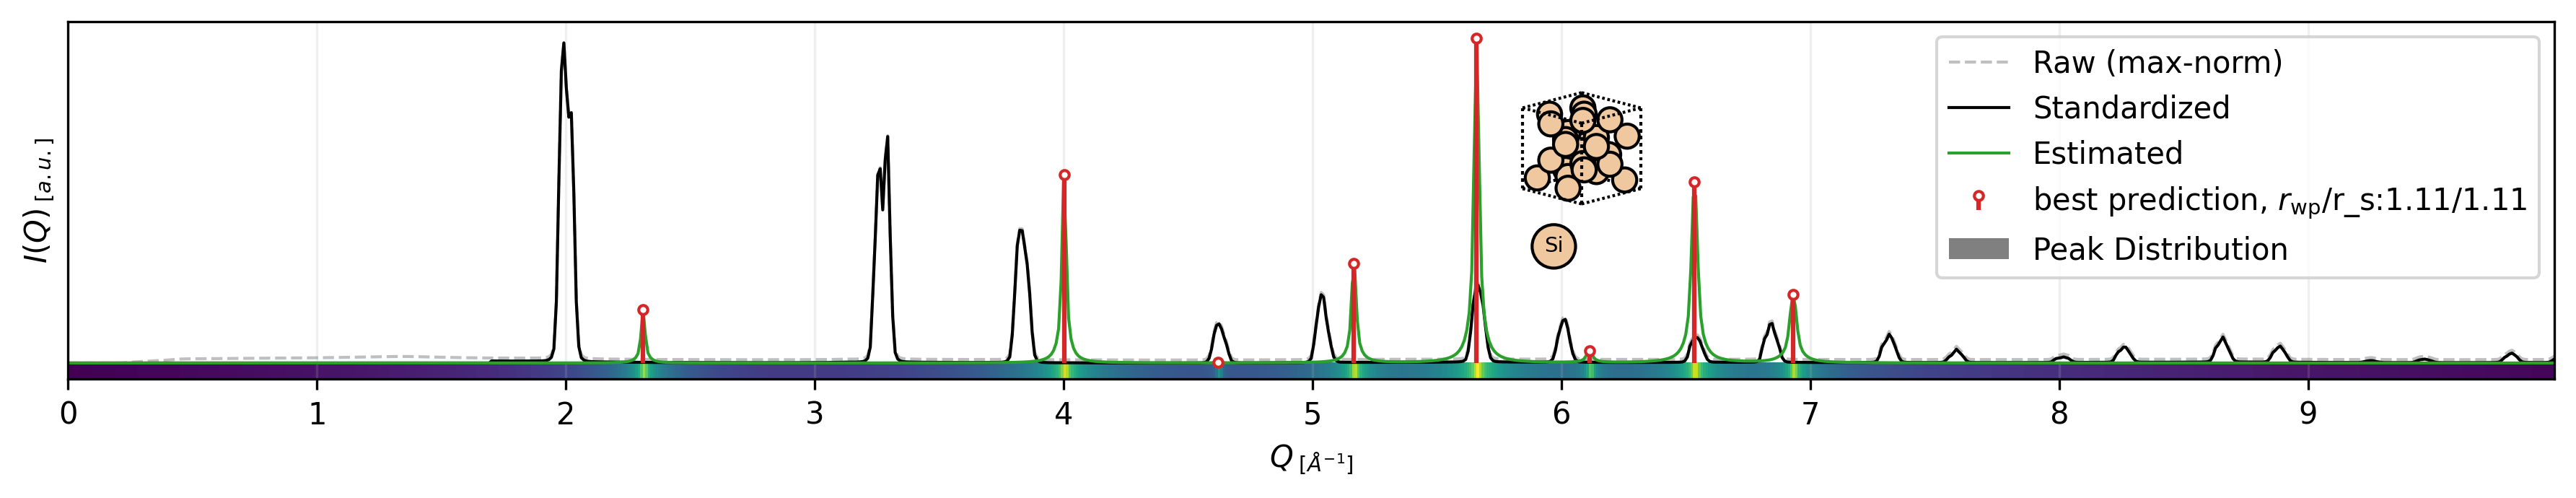

In [6]:
global_plotting_config = dict(
    size_estimate=100,
    base_fwhm=0.001,
    complexity_weight=0.00,
    atom_radii=0.5, 
    atom_offset=(0, 2, 0),
    atom_legend_radius=1.0,
    struc_offset_x=0.1,
    struc_offset_y=0.25,
    struc_scale_height=0.75,
    struc_axis_off=True,
    struc_add_axis_x = 6.0,
    figsize=(10*1.2,2*1.2),
    dpi=300,    
    show_estimation=True,
    show_second_best=False,
)
pipeline.setup_folder("crystalline_Si")
result_paths = sorted(glob(os.path.join(pipeline.results_output_folder, '*cubic.pkl'))) if pipeline.results_output_folder is not None else []

for path in result_paths:
    pipeline.load_pickle(path)
    pipeline.plot_pxrd_and_structure(**global_plotting_config)

In [1]:
from bin.experimental_pipeline import DeciferPipeline
from bin.train import TrainConfig
from glob import glob
import os
import matplotlib.pyplot as plt
pipeline = DeciferPipeline(
    model_path="../../deCIFer/experiments/model__conditioned_mlp_augmentation__context_3076__robust/ckpt.pt",
    zip_path="experimental_data.zip",
    results_output_folder="results_output",
)


In [8]:
pipeline.setup_folder("crystalline_Fe2O3")

target_files = ["AFS012d_a850C.xy"]
background_file = None

wavelength=1.5406
q_min_crop=0.5
q_max_crop=8
n_trials = 1
DEBUG_MAX = None

protocols = [
    # [{}, "none"],
    [{"composition": "Fe32O48"}, "Fe32O48"],
    # [{"composition": "Fe2xO3x", "composition_ranges": {"Fe": (1,4)}, "spacegroup": "R-3c_sg"}, "Fe2xO3x_sg"],
    # [{"composition": "Fe12O18", "spacegroup": "R-3c_sg"}, "Fe12O18_sg"],
    # [{"composition": "Six", "composition_ranges": {"Si": (1,4)}}, "Six"],
    # [{"composition": "Six", "composition_ranges": {"Si": (1,4)}, "spacegroup": "Fd-3m_sg"}, "Six_sg"],
]

for target_file in target_files[:DEBUG_MAX]:
    pipeline.prepare_target_data(
        target_file=target_file,
        background_file=background_file,
        wavelength=wavelength,
        q_min_crop=q_min_crop,
        q_max_crop=q_max_crop,
    )

    if False:
        fig, ax = plt.subplots()
        ax.plot(pipeline.exp_q, pipeline.exp_i)
        ax.plot(pipeline.raw_q, pipeline.raw_i)
        ax.set_ylim(0,1)
        plt.show()
        break
    
    for i, (cfg, name) in enumerate(protocols, 1):
        pipeline.run_experiment_protocol(
            n_trials=n_trials,
            protocol_name=name,
            save_to=f"{target_file.split(".")[0]}_protocol_{name}.pkl", 
            **cfg
        )

Running trials for protocol Fe32O48:   0%|                                                        | 0/1 [00:00…

Generating custom sequence: 0 tokens [00:00, ? tokens/s]

Data saved to crystalline_Fe2O3/AFS012d_a850C_protocol_Fe32O48.pkl


Data loaded from crystalline_Fe2O3/AFS012d_a850C_protocol_Fe12O18.pkl


Finding best structure...:   0%|                                                                 | 0/50 [00:00…

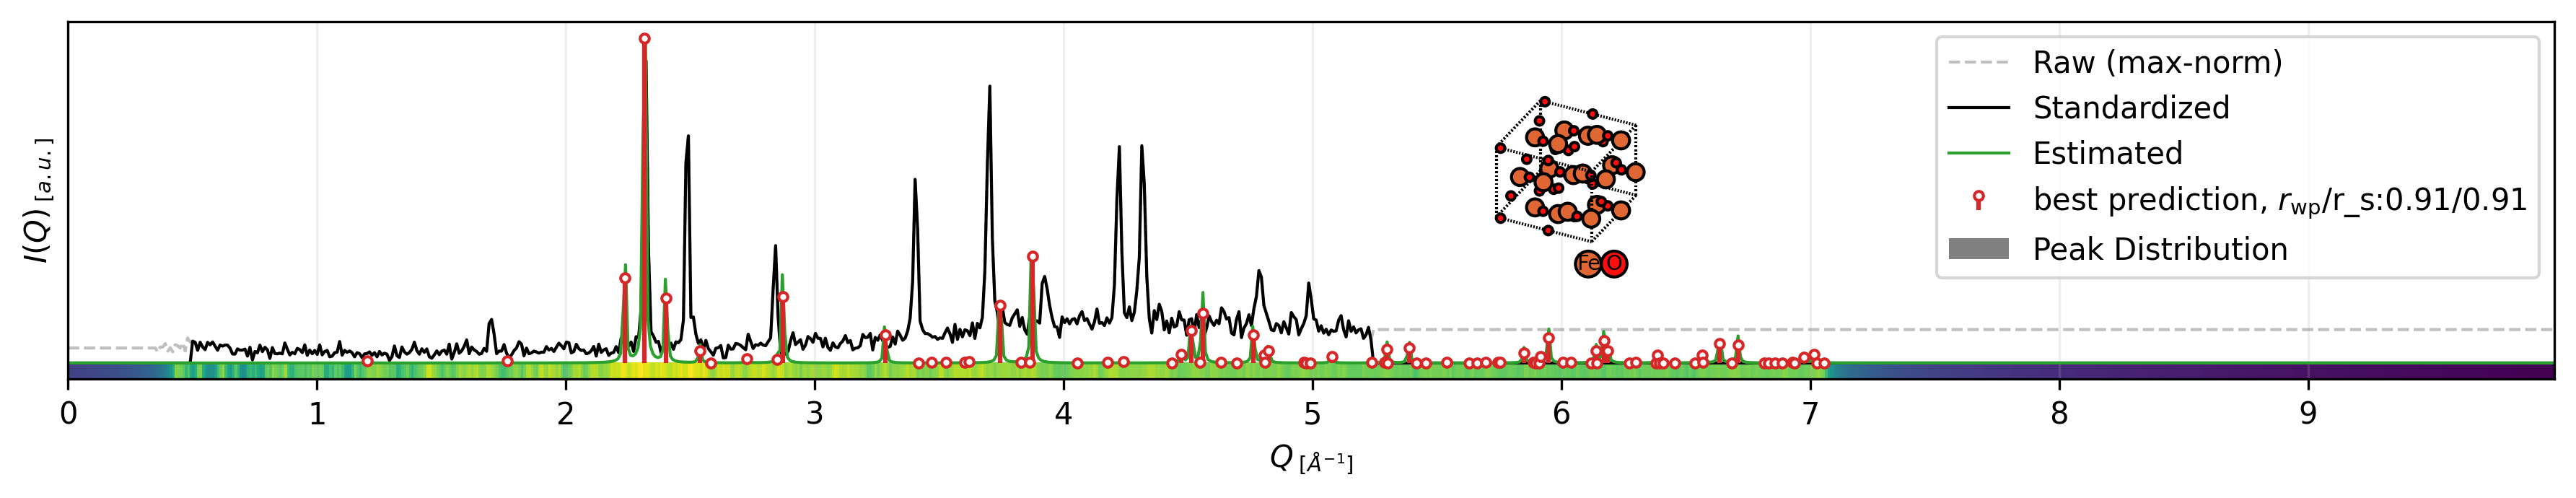

In [10]:
global_plotting_config = dict(
    size_estimate=1000,
    base_fwhm=0.01,
    complexity_weight=0.00,
    atom_radii=0.5, 
    atom_offset=(0, 2, 0),
    atom_legend_radius=1.0,
    struc_offset_x=0.1,
    struc_offset_y=0.25,
    struc_scale_height=1.2,
    struc_axis_off=True,
    struc_add_axis_x = 6.0,
    figsize=(10*1.2,2*1.2),
    dpi=300,    
    show_estimation=True,
    show_second_best=False,
    q_min_crop=0.5,
    q_max_crop=8.0, # TODO
)
pipeline.setup_folder("crystalline_Fe2O3")
result_paths = sorted(glob(os.path.join(pipeline.results_output_folder, '*18.pkl'))) if pipeline.results_output_folder is not None else []

for path in result_paths:
    pipeline.load_pickle(path)
    pipeline.plot_pxrd_and_structure(**global_plotting_config)

In [4]:
pipeline.set_output_folder("crystalline_Si_Mythen")

target_files = ["Si_Mythen.xye"]
background_file = None

wavelength=0.825008
q_min_crop=1.8
q_max_crop=8
n_trials = 25
DEBUG_MAX = None

protocols = [
    # [{}, "none"],
    # [{"composition": "Six", "composition_ranges": {"Si": (1,8)}}, "Six"],
    [{"composition": "Si8"}, "Si8"],
    # [{"composition": "Six", "composition_ranges": {"Si": (1,4)}, "crystal_systems": [4,5,6,7]}, "Six_crystal"],
    # [{"composition": "Si1", "crystal_systems": [7]}, "Si1_cubic"],
]

for target_file in target_files[:DEBUG_MAX]:
    pipeline.prepare_target_data(
        target_file=target_file,
        background_file=background_file,
        wavelength=wavelength,
        q_min_crop=q_min_crop,
        q_max_crop=q_max_crop,
    )

    if False:
        fig, ax = plt.subplots()
        ax.plot(pipeline.exp_q, pipeline.exp_i)
        plt.show()
        break
    
    for i, (cfg, name) in enumerate(protocols, 1):
        pipeline.run_experiment_protocol(
            n_trials=n_trials,
            protocol_idx=i,
            save_to=f"{target_file.split(".")[0]}_protocol_{name}.pkl", 
            verbose=False, 
            **cfg
        )

Started protocol 1...
Finished protocol 1 for Si_Mythen.xye: 1/25
Finished protocol 1 for Si_Mythen.xye: 2/25
Finished protocol 1 for Si_Mythen.xye: 3/25
Finished protocol 1 for Si_Mythen.xye: 4/25
Finished protocol 1 for Si_Mythen.xye: 5/25
Finished protocol 1 for Si_Mythen.xye: 6/25
Finished protocol 1 for Si_Mythen.xye: 7/25
Finished protocol 1 for Si_Mythen.xye: 8/25
Finished protocol 1 for Si_Mythen.xye: 9/25
Finished protocol 1 for Si_Mythen.xye: 10/25
Finished protocol 1 for Si_Mythen.xye: 11/25
Finished protocol 1 for Si_Mythen.xye: 12/25
Finished protocol 1 for Si_Mythen.xye: 13/25
Finished protocol 1 for Si_Mythen.xye: 14/25
Finished protocol 1 for Si_Mythen.xye: 15/25
Finished protocol 1 for Si_Mythen.xye: 16/25
Finished protocol 1 for Si_Mythen.xye: 17/25
Finished protocol 1 for Si_Mythen.xye: 18/25
Finished protocol 1 for Si_Mythen.xye: 19/25
Finished protocol 1 for Si_Mythen.xye: 20/25
Finished protocol 1 for Si_Mythen.xye: 21/25
Finished protocol 1 for Si_Mythen.xye: 22/

Data loaded from crystalline_Si_Mythen/Si_Mythen_protocol_Si1_cubic.pkl


Finding best structure...:   0%|                                                                  | 0/1 [00:00…

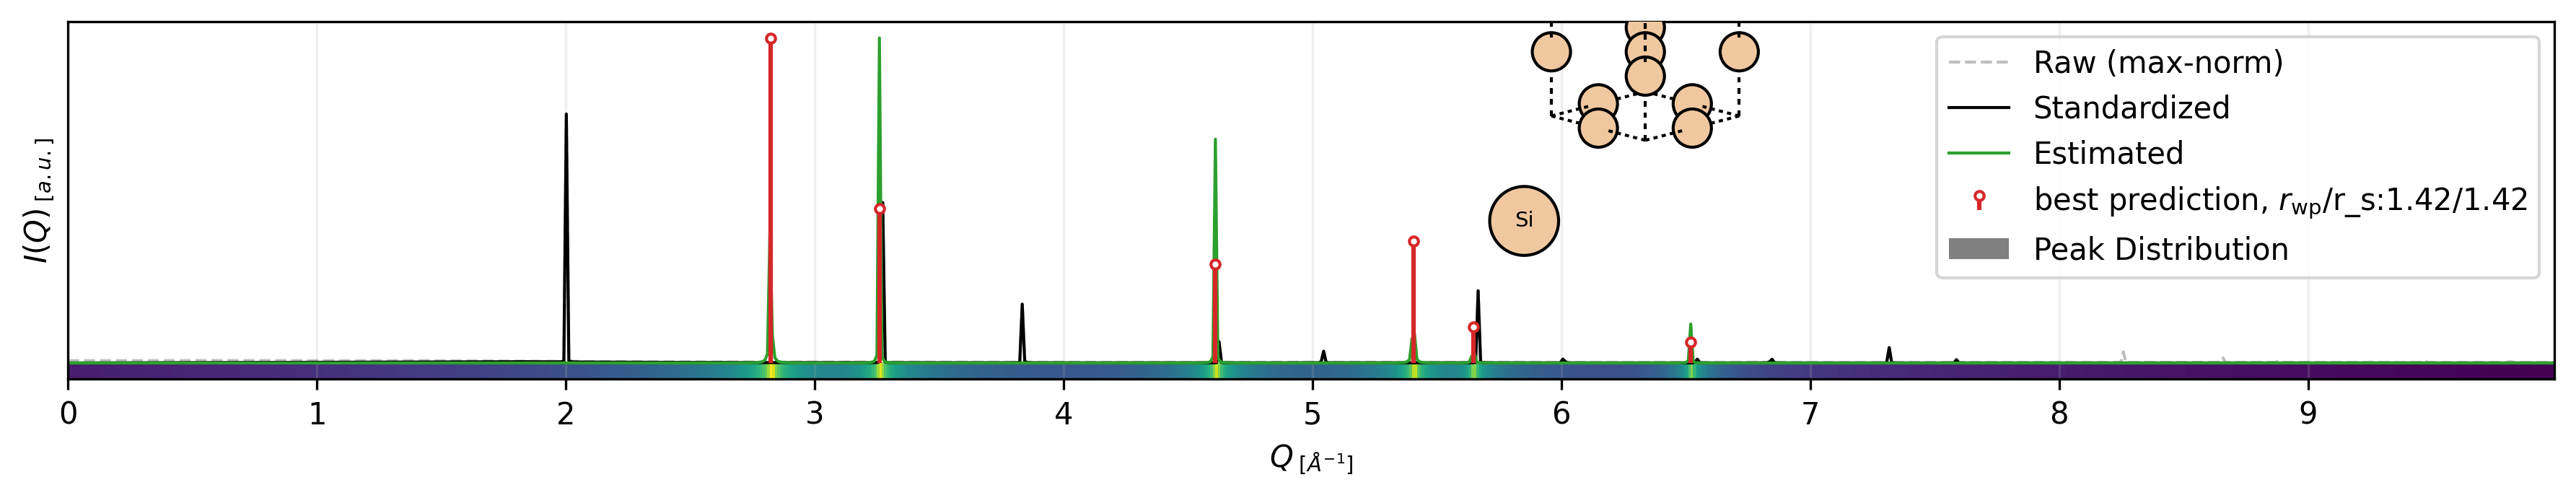

Data loaded from crystalline_Si_Mythen/Si_Mythen_protocol_Si8.pkl


Finding best structure...:   0%|                                                                 | 0/25 [00:00…

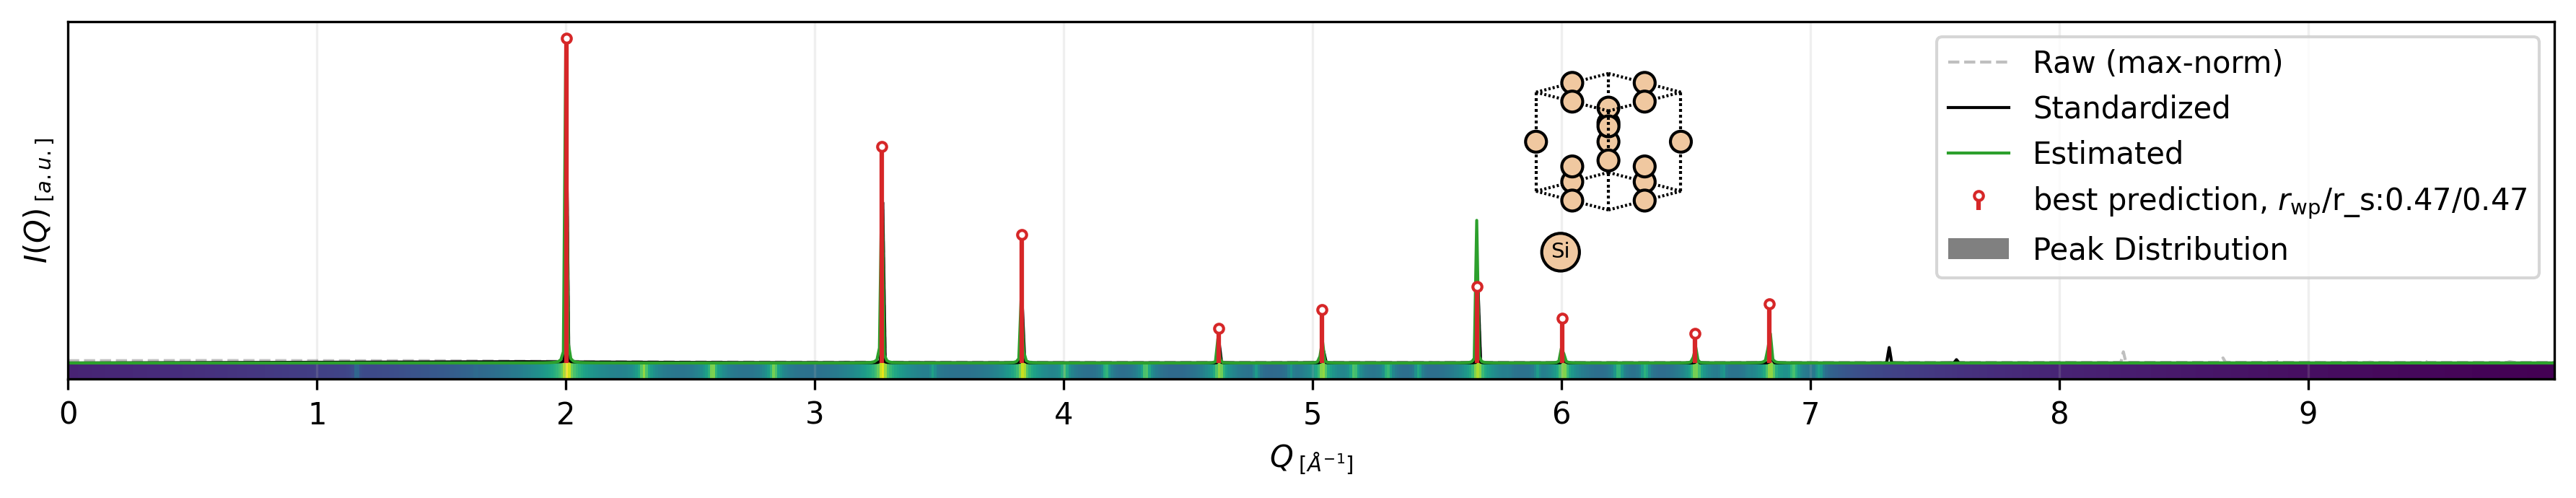

Data loaded from crystalline_Si_Mythen/Si_Mythen_protocol_Six.pkl


Finding best structure...:   0%|                                                                 | 0/19 [00:00…

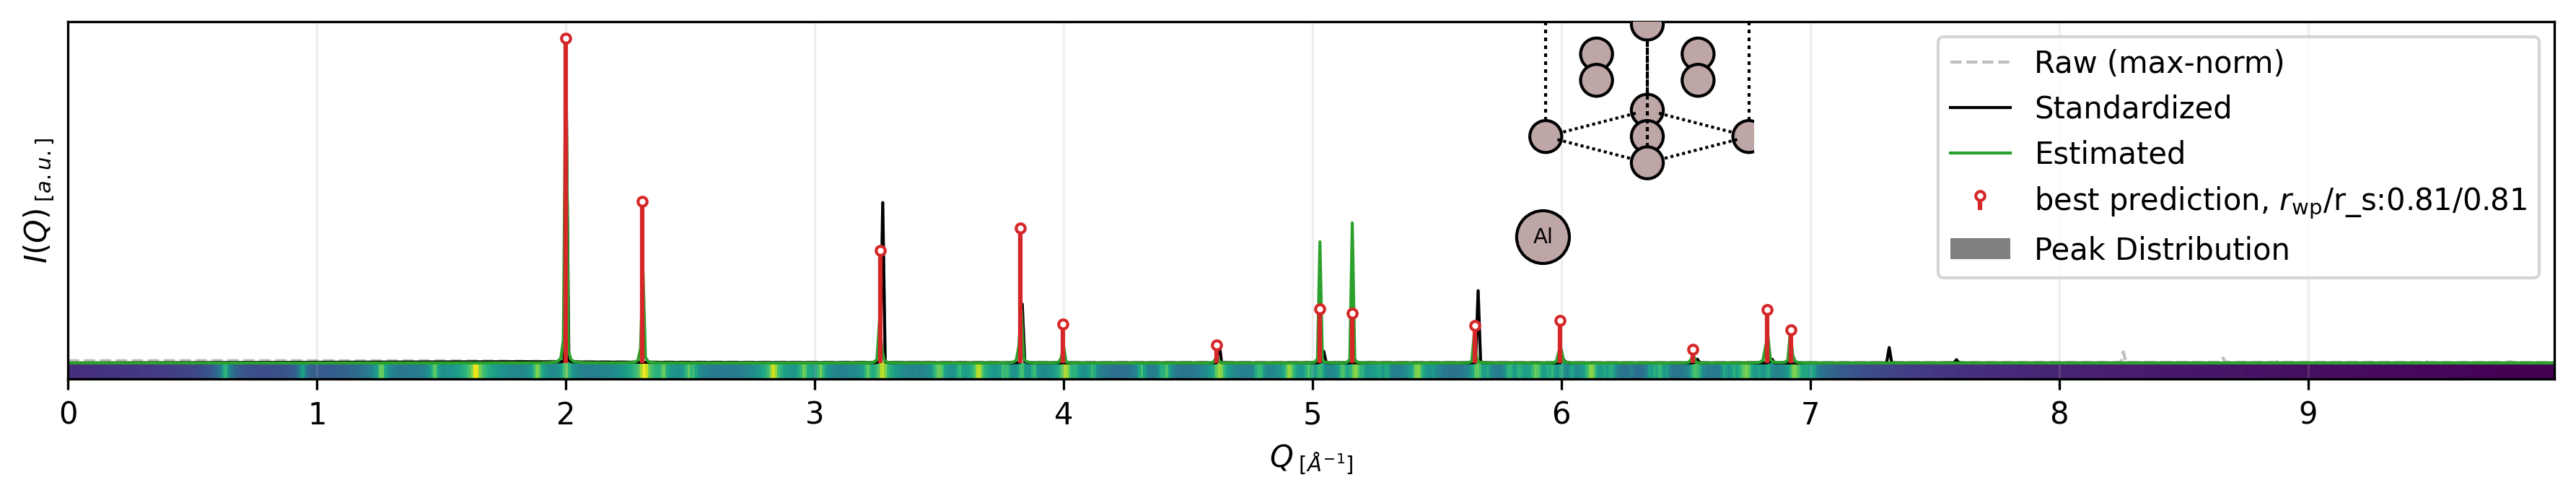

Data loaded from crystalline_Si_Mythen/Si_Mythen_protocol_none.pkl


Finding best structure...:   0%|                                                                 | 0/24 [00:00…

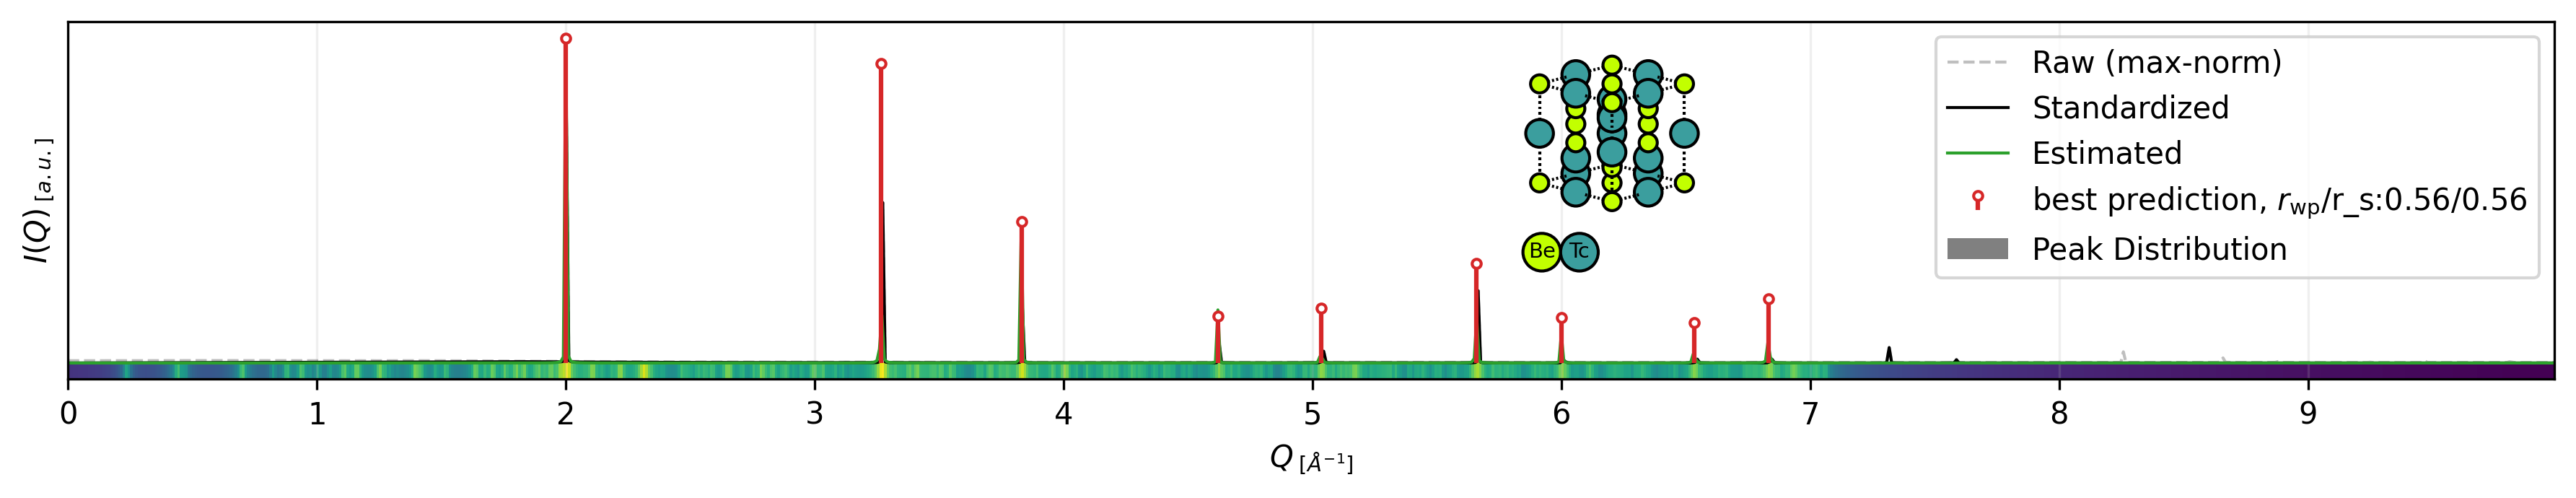

In [5]:
global_plotting_config = dict(
    size_estimate=1000,
    base_fwhm=0.001,
    complexity_weight=0.00,
    atom_radii=0.5, 
    atom_offset=(0, 2, 0),
    atom_legend_radius=1.0,
    struc_offset_x=0.1,
    struc_offset_y=0.25,
    struc_scale_height=0.75,
    struc_axis_off=True,
    struc_add_axis_x = 6.0,
    figsize=(10*1.2,2*1.2),
    dpi=300,    
    show_estimation=True,
    show_second_best=False,
)
pipeline.setup_folder("crystalline_Si_Mythen")
result_paths = sorted(glob(os.path.join(pipeline.results_output_folder, '*.pkl'))) if pipeline.results_output_folder is not None else []

for path in result_paths:
    pipeline.load_pickle(path)
    pipeline.plot_pxrd_and_structure(**global_plotting_config)

In [ ]:
global_plotting_config = dict(
    size_estimate=1000,
    base_fwhm=0.001,
    complexity_weight=0.00,
    atom_radii=0.5, 
    atom_offset=(0, 2, 0),
    atom_legend_radius=1.0,
    struc_offset_x=0.1,
    struc_offset_y=0.25,
    struc_scale_height=0.75,
    struc_axis_off=True,
    struc_add_axis_x = 6.0,
    figsize=(10*1.2,2*1.2),
    dpi=300,    
    show_estimation=True,
    show_second_best=False,
)
pipeline.setup_folder("crystalline_Si_Mythen")
result_paths = sorted(glob(os.path.join(pipeline.results_output_folder, '*.pkl'))) if pipeline.results_output_folder is not None else []

for path in result_paths:
    pipeline.load_pickle(path)
    pipeline.plot_pxrd_and_structure(**global_plotting_config)

### Rebecca

In [3]:
target_files = ["Hydrolyse_ID5_20min_3-56_boro_0p8.xy",
                "Hydrolyse_ID6_20min_3-56_boro_0p8.xy", 
                "Hydrolyse_ID8_20min_3-56_boro_0p8.xy",
                "Hydrolyse_ID10_20min_3-56_boro_0p8.xy",
               ]
background_file = "boroglass_0p8_empty_VCT_72h.xy"
wavelength=0.5594075
q_min_crop=1.5
q_max_crop=8.0
n_trials = 1
DEBUG_MAX = 1

protocols = [
        {}, 
        {"composition": "CexO2x", "composition_ranges": {"Ce": (1,4)}}, 
        {"composition": "CexO2x", "composition_ranges": {"Ce": (1,4)}, "crystal_systems": [7]}, 
        {"composition": "Ce4O8", "spacegroup": "Fm-3m_sg"}
    ]

for target_file in target_files[:DEBUG_MAX]:
    pipeline.prepare_target_data(
        target_file=target_file,
        background_file=background_file,
        wavelength=wavelength,
        q_min_crop=q_min_crop,
        q_max_crop=q_max_crop,
    )
    
    for i, cfg in enumerate(protocols, 1):
        pipeline.run_experiment_protocol(
            n_trials=n_trials,
            protocol_idx=i,
            save_to=f"{target_file.split(".")[0]}_prt{i}.pkl", 
            verbose=False, 
            **cfg
        )

Finished protocol 1 for Hydrolyse_ID5_20min_3-56_boro_0p8.xy: 1/1
Data saved to Hydrolyse_ID5_20min_3-56_boro_0p8_prt1.pkl
Finished protocol 2 for Hydrolyse_ID5_20min_3-56_boro_0p8.xy: 1/1
Data saved to Hydrolyse_ID5_20min_3-56_boro_0p8_prt2.pkl
Finished protocol 3 for Hydrolyse_ID5_20min_3-56_boro_0p8.xy: 1/1
Data saved to Hydrolyse_ID5_20min_3-56_boro_0p8_prt3.pkl
Finished protocol 4 for Hydrolyse_ID5_20min_3-56_boro_0p8.xy: 1/1
Data saved to Hydrolyse_ID5_20min_3-56_boro_0p8_prt4.pkl


In [6]:
target_files = ["scan-4907_mean.xy",
                "scan-4911_mean.xy", 
                "scan-4912_mean.xy",
                "scan-4919_mean.xy",
               ]
background_file = "scan-4903_mean.xy"
wavelength=None # Already in Q
q_min_crop=1.5
q_max_crop=8.0
n_trials = 1
DEBUG_MAX = 1

protocols = [
        {}, 
        {"composition": "CexO2x", "composition_ranges": {"Ce": (1,4)}}, 
        {"composition": "CexO2x", "composition_ranges": {"Ce": (1,4)}, "crystal_systems": [7]}, 
        {"composition": "Ce4O8", "spacegroup": "Fm-3m_sg"}
    ]

for target_file in target_files[:DEBUG_MAX]:
    pipeline.prepare_target_data(
        target_file=target_file,
        background_file=background_file,
        wavelength=wavelength,
        q_min_crop=q_min_crop,
        q_max_crop=q_max_crop,
    )
    
    for i, cfg in enumerate(protocols, 1):
        pipeline.run_experiment_protocol(
            n_trials=n_trials,
            protocol_idx=i,
            save_to=f"{target_file.split(".")[0]}_prt{i}.pkl", 
            verbose=False, 
            **cfg
        )

Started protocol 1...
Finished protocol 1 for scan-4907_mean.xy: 1/1
Data saved to scan-4907_mean_prt1.pkl
Started protocol 2...
Finished protocol 2 for scan-4907_mean.xy: 1/1
Data saved to scan-4907_mean_prt2.pkl
Started protocol 3...
Finished protocol 3 for scan-4907_mean.xy: 1/1
Data saved to scan-4907_mean_prt3.pkl
Started protocol 4...
Finished protocol 4 for scan-4907_mean.xy: 1/1
Data saved to scan-4907_mean_prt4.pkl


### Laura

In [3]:
target_files = [
    "IrO2_3nm_30minXRD.xy",
    "IrO2_1nm_30minXRD.xy", 
    "IrO2_3nm_30minXRD.xy",
    "IrO2_9nmRod_30minXRD.xy",
    ]
background_file = None
wavelength=1.5406
q_min_crop=1.5
q_max_crop=8.0
n_trials = 5
DEBUG_MAX = 1

protocols = [
        {}, 
        {"composition": "IrxO2x", "composition_ranges": {"Ir": (1,4)}}, 
        {"composition": "IrxO2x", "composition_ranges": {"Ir": (1,4)}, "crystal_systems": [4]}, 
        {"composition": "Ir4O8", "spacegroup": "P4_2/mnm_sg"}
    ]

for target_file in target_files[:DEBUG_MAX]:
    pipeline.prepare_target_data(
        target_file=target_file,
        background_file=background_file,
        wavelength=wavelength,
        q_min_crop=q_min_crop,
        q_max_crop=q_max_crop,
    )

    if False:
        fig, ax = plt.subplots()
        ax.plot(pipeline.exp_q, pipeline.exp_i)
        plt.show()
        break
    
    for i, cfg in enumerate(protocols, 1):
        pipeline.run_experiment_protocol(
            n_trials=n_trials,
            protocol_idx=i,
            save_to=f"{target_file.split(".")[0]}_prt{i}.pkl", 
            verbose=False, 
            **cfg
        )

Started protocol 1...


KeyboardInterrupt: 

### Nicolas, FCC + FCT

In [63]:
target_files = [
    "NS_PtHEI_400C180m.xy", 
    "NS_PtHEI_550C_120m_4h.xye",
    "NS_PtHEI_550C60m.xy",
    "NS_PtHEI_700C_90m.xye",
    ]
background_file = None
wavelength=1.5406
q_min_crop=1.0
q_max_crop=8.0
n_trials = 10
DEBUG_MAX = None

protocols = [
        # {}, 
        # [
        #     {"composition": "Pt5xNix",  "composition_ranges": {"Pt": (1,4)}, "exclusive_elements": ['Pt', 'Ni']}, 
        #      "Pt5xNix"
        # ],
        # [
        #     {"composition": "Pt5xNix",  "composition_ranges": {"Pt": (1,4)}, "exclusive_elements": ['Pt', 'Ni'],
        #     "crystal_systems": [4]}, 
        #      "Pt5xNixTetragonal"
        # ],
        # [
        #     {"composition": "Pt5xNix",  "composition_ranges": {"Pt": (1,4)}, "exclusive_elements": ['Pt', 'Ni'],
        #     "crystal_systems": [7]}, 
        #      "Pt5xNixCubic"
        # ],
        # [
        #     {"composition": "Ptx",  "composition_ranges": {"Pt": (1,5)}, "crystal_systems": [7]}, 
        #      "PtxCubic"
        # ],
        [
            {"composition": "Ptx",  "composition_ranges": {"Pt": (1,5)}, "spacegroup": 'Fm-3m_sg'}, 
             "PtFCC"
        ],
        #{"exclusive_elements": ['Pt', 'Mn', 'Fe', 'Co' 'Ni', 'Cu'], "composition": "Pt5xMnxFexCoxNixCux",  "composition_ranges": {"Pt": (1,4)}}, 
        # {"composition": "IrxO2x", "composition_ranges": {"Ir": (1,4)}, "crystal_systems": [4]}, 
        # {"composition": "Ir4O8", "spacegroup": "P4_2/mnm_sg"}
    ]

for target_file in target_files[:DEBUG_MAX]:
    pipeline.prepare_target_data(
        target_file=target_file,
        background_file=background_file,
        wavelength=wavelength,
        q_min_crop=q_min_crop,
        q_max_crop=q_max_crop,
    )

    if False:
        fig, ax = plt.subplots()
        # print(pipeline.exp_i)
        ax.plot(pipeline.exp_q, pipeline.exp_i)
        plt.show()
        break
    
    for i, (cfg, prt_name) in enumerate(protocols, 1):
        pipeline.run_experiment_protocol(
            n_trials=n_trials,
            protocol_idx=i,
            save_to=f"{target_file.split(".")[0]}_prt_{prt_name}.pkl", 
            verbose=False, 
            **cfg
        )

Started protocol 1...
Finished protocol 1 for NS_PtHEI_400C180m.xy: 1/10
Finished protocol 1 for NS_PtHEI_400C180m.xy: 2/10
Finished protocol 1 for NS_PtHEI_400C180m.xy: 3/10
Finished protocol 1 for NS_PtHEI_400C180m.xy: 4/10
Finished protocol 1 for NS_PtHEI_400C180m.xy: 5/10
Finished protocol 1 for NS_PtHEI_400C180m.xy: 6/10
Finished protocol 1 for NS_PtHEI_400C180m.xy: 7/10
Finished protocol 1 for NS_PtHEI_400C180m.xy: 8/10
Finished protocol 1 for NS_PtHEI_400C180m.xy: 9/10
Finished protocol 1 for NS_PtHEI_400C180m.xy: 10/10
Data saved to NS_PtHEI_400C180m_prt_PtFCC.pkl
Started protocol 1...
Finished protocol 1 for NS_PtHEI_550C_120m_4h.xye: 1/10
Finished protocol 1 for NS_PtHEI_550C_120m_4h.xye: 2/10
Finished protocol 1 for NS_PtHEI_550C_120m_4h.xye: 3/10
Finished protocol 1 for NS_PtHEI_550C_120m_4h.xye: 4/10
Finished protocol 1 for NS_PtHEI_550C_120m_4h.xye: 5/10
Finished protocol 1 for NS_PtHEI_550C_120m_4h.xye: 6/10
Finished protocol 1 for NS_PtHEI_550C_120m_4h.xye: 7/10
Finishe

## Nicolas Pure FCC

In [69]:
target_files = [
    "NS_PtHEI_300C_360m_4h.xye", 
    "NS_PtHEI_300C90m.xy",
    "NS_PtHEI_300C180m.xy",
    "NS_PtHEI_350C_120m.xye",
    "NS_PtHEI_350C_240m.xye",
    ]
background_file = None
wavelength=1.5406
q_min_crop=1.0
q_max_crop=8.0
n_trials = 25
DEBUG_MAX = 1

protocols = [
        [
            {"composition": "Pt5xNix",  "composition_ranges": {"Pt": (1,4)}, "exclusive_elements": ['Pt', 'Ni']}, 
             "Pt5xNix"
        ],
        [
            {"composition": "Pt5xNix",  "composition_ranges": {"Pt": (1,4)}, "exclusive_elements": ['Pt', 'Ni'],
            "crystal_systems": [4]}, 
             "Pt5xNixTetragonal"
        ],
        [
            {"composition": "Pt5xNix",  "composition_ranges": {"Pt": (1,4)}, "exclusive_elements": ['Pt', 'Ni'],
            "crystal_systems": [7]}, 
             "Pt5xNixCubic"
        ],
        [
            {"composition": "Ptx",  "composition_ranges": {"Pt": (1,5)}, "crystal_systems": [7]}, 
             "PtxCubic"
        ],
        [
            {"composition": "Ptx",  "composition_ranges": {"Pt": (1,5)}, "spacegroup": 'Fm-3m_sg'}, 
             "PtFCC"
        ],
    ]

for target_file in target_files[:DEBUG_MAX]:
    pipeline.prepare_target_data(
        target_file=target_file,
        background_file=background_file,
        wavelength=wavelength,
        q_min_crop=q_min_crop,
        q_max_crop=q_max_crop,
    )

    if False:
        fig, ax = plt.subplots()
        # print(pipeline.exp_i)
        ax.plot(pipeline.exp_q, pipeline.exp_i)
        plt.show()
        break
    
    for i, (cfg, prt_name) in enumerate(protocols, 1):
        pipeline.run_experiment_protocol(
            n_trials=n_trials,
            protocol_idx=i,
            save_to=f"{target_file.split(".")[0]}_prt_{prt_name}.pkl", 
            verbose=False, 
            **cfg
        )

Started protocol 1...
Finished protocol 1 for NS_PtHEI_300C_360m_4h.xye: 1/25
Finished protocol 1 for NS_PtHEI_300C_360m_4h.xye: 2/25
Finished protocol 1 for NS_PtHEI_300C_360m_4h.xye: 3/25
Finished protocol 1 for NS_PtHEI_300C_360m_4h.xye: 4/25
Finished protocol 1 for NS_PtHEI_300C_360m_4h.xye: 5/25
Finished protocol 1 for NS_PtHEI_300C_360m_4h.xye: 6/25
Finished protocol 1 for NS_PtHEI_300C_360m_4h.xye: 7/25
Finished protocol 1 for NS_PtHEI_300C_360m_4h.xye: 8/25
Finished protocol 1 for NS_PtHEI_300C_360m_4h.xye: 9/25
Finished protocol 1 for NS_PtHEI_300C_360m_4h.xye: 10/25
Finished protocol 1 for NS_PtHEI_300C_360m_4h.xye: 11/25
Finished protocol 1 for NS_PtHEI_300C_360m_4h.xye: 12/25
Finished protocol 1 for NS_PtHEI_300C_360m_4h.xye: 13/25
Finished protocol 1 for NS_PtHEI_300C_360m_4h.xye: 14/25
Finished protocol 1 for NS_PtHEI_300C_360m_4h.xye: 15/25
Finished protocol 1 for NS_PtHEI_300C_360m_4h.xye: 16/25
Finished protocol 1 for NS_PtHEI_300C_360m_4h.xye: 17/25
len(items)=260 is 

KeyboardInterrupt: 

In [16]:
target_files = [
    "crystalline_CeO2_BM31.xye",
    ]
background_file = None
wavelength=0.25448
q_min_crop=1.5
q_max_crop=8.0
n_trials = 10
DEBUG_MAX = None

protocols = [
        # [{}, "crystallineCeO2"],
        # [{"composition": "CexO2x", "composition_ranges": {"Ce": (1,4)}}, "crystallineCexO2x"],
        [{"composition": "CexOy", "composition_ranges": {"Ce": (1,4), "O": (1,4)}}, "crystallineCexOy"],
    ]

for target_file in target_files[:DEBUG_MAX]:
    pipeline.prepare_target_data(
        target_file=target_file,
        background_file=background_file,
        wavelength=wavelength,
        q_min_crop=q_min_crop,
        q_max_crop=q_max_crop,
    )

    if False:
        fig, ax = plt.subplots()
        # print(pipeline.exp_i)
        ax.plot(pipeline.exp_q, pipeline.exp_i)
        plt.show()
        break
    
    for i, (cfg, prt_name) in enumerate(protocols, 1):
        pipeline.run_experiment_protocol(
            n_trials=n_trials,
            protocol_idx=i,
            save_to=f"{target_file.split(".")[0]}_prt_{prt_name}.pkl", 
            verbose=False, 
            **cfg
        )

Started protocol 1...
Finished protocol 1 for crystalline_CeO2_BM31.xye: 1/10
Finished protocol 1 for crystalline_CeO2_BM31.xye: 2/10
Finished protocol 1 for crystalline_CeO2_BM31.xye: 3/10
Finished protocol 1 for crystalline_CeO2_BM31.xye: 4/10
Finished protocol 1 for crystalline_CeO2_BM31.xye: 5/10
Finished protocol 1 for crystalline_CeO2_BM31.xye: 6/10
Finished protocol 1 for crystalline_CeO2_BM31.xye: 7/10
Finished protocol 1 for crystalline_CeO2_BM31.xye: 8/10
Finished protocol 1 for crystalline_CeO2_BM31.xye: 9/10
Finished protocol 1 for crystalline_CeO2_BM31.xye: 10/10
Data saved to crystalline_CeO2_BM31_prt_crystallineCexOy.pkl


Data loaded from results_output/crystalline_CeO2_BM31_prt_crystallineCe4O8.pkl


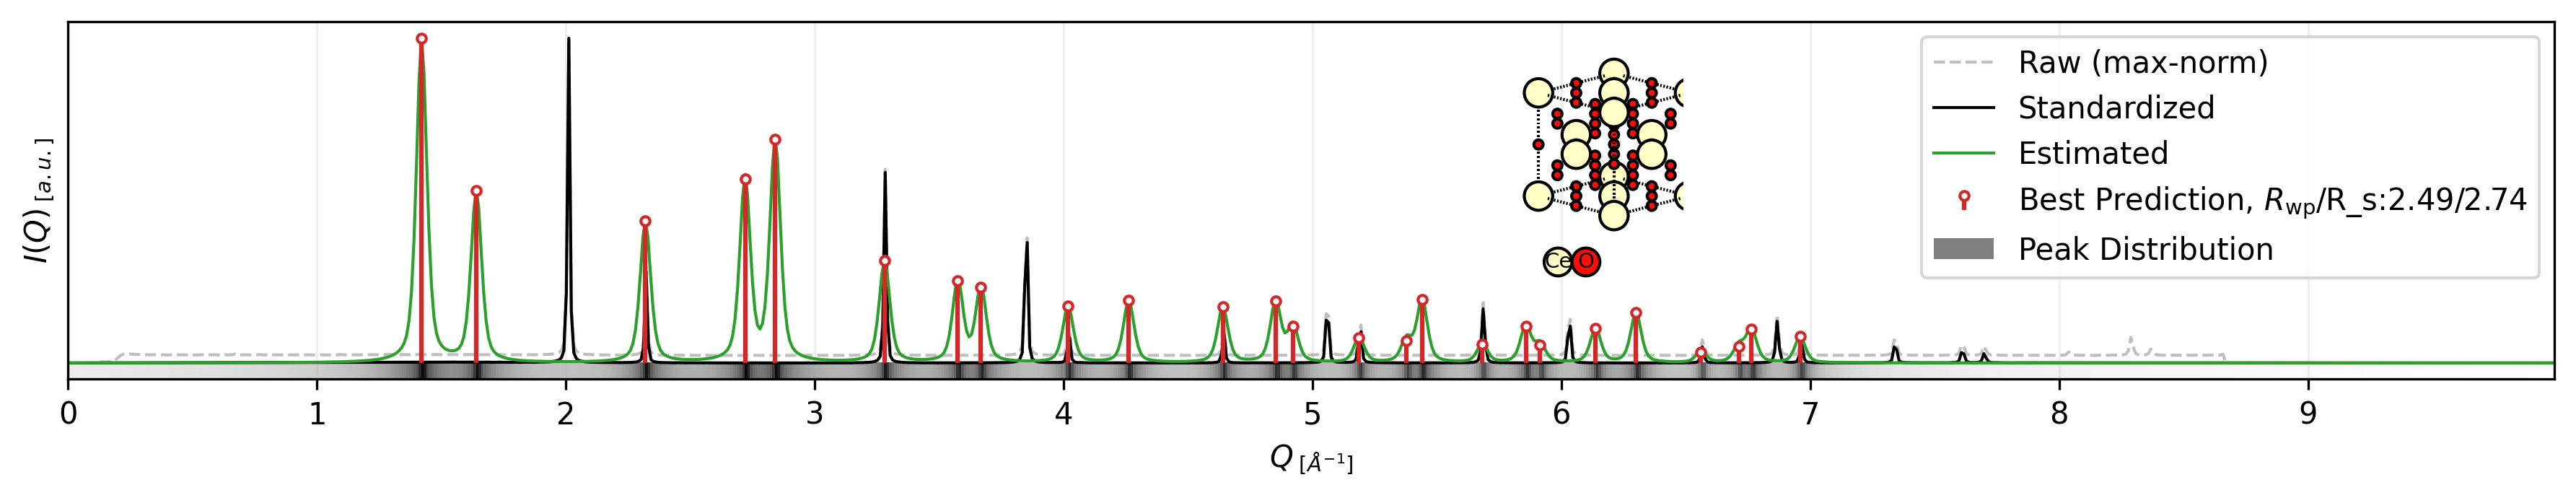

Data loaded from results_output/crystalline_CeO2_BM31_prt_crystallineCeO2.pkl


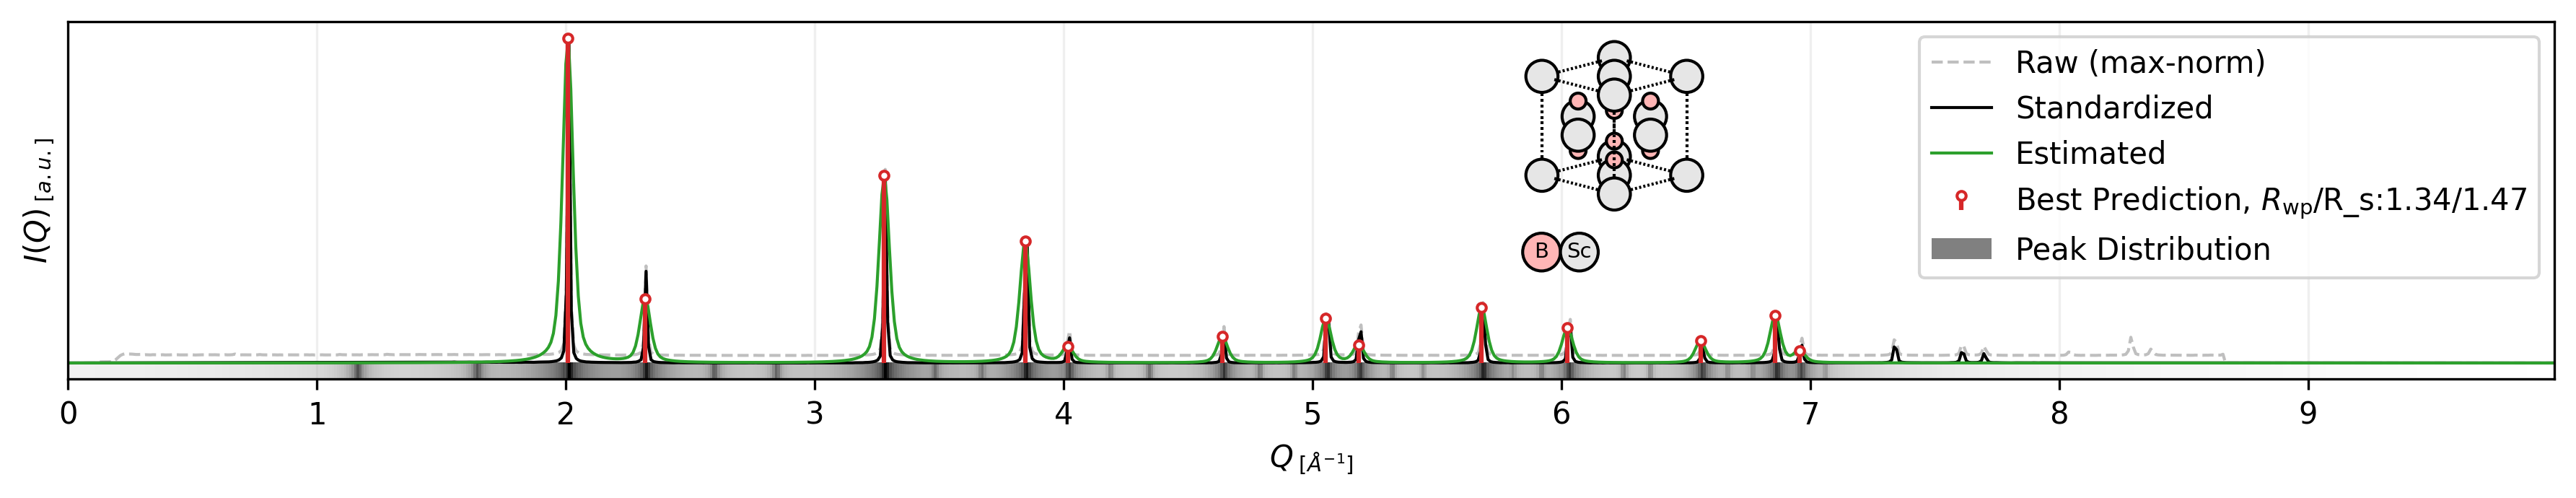

Data loaded from results_output/crystalline_CeO2_BM31_prt_crystallineCexO2x.pkl


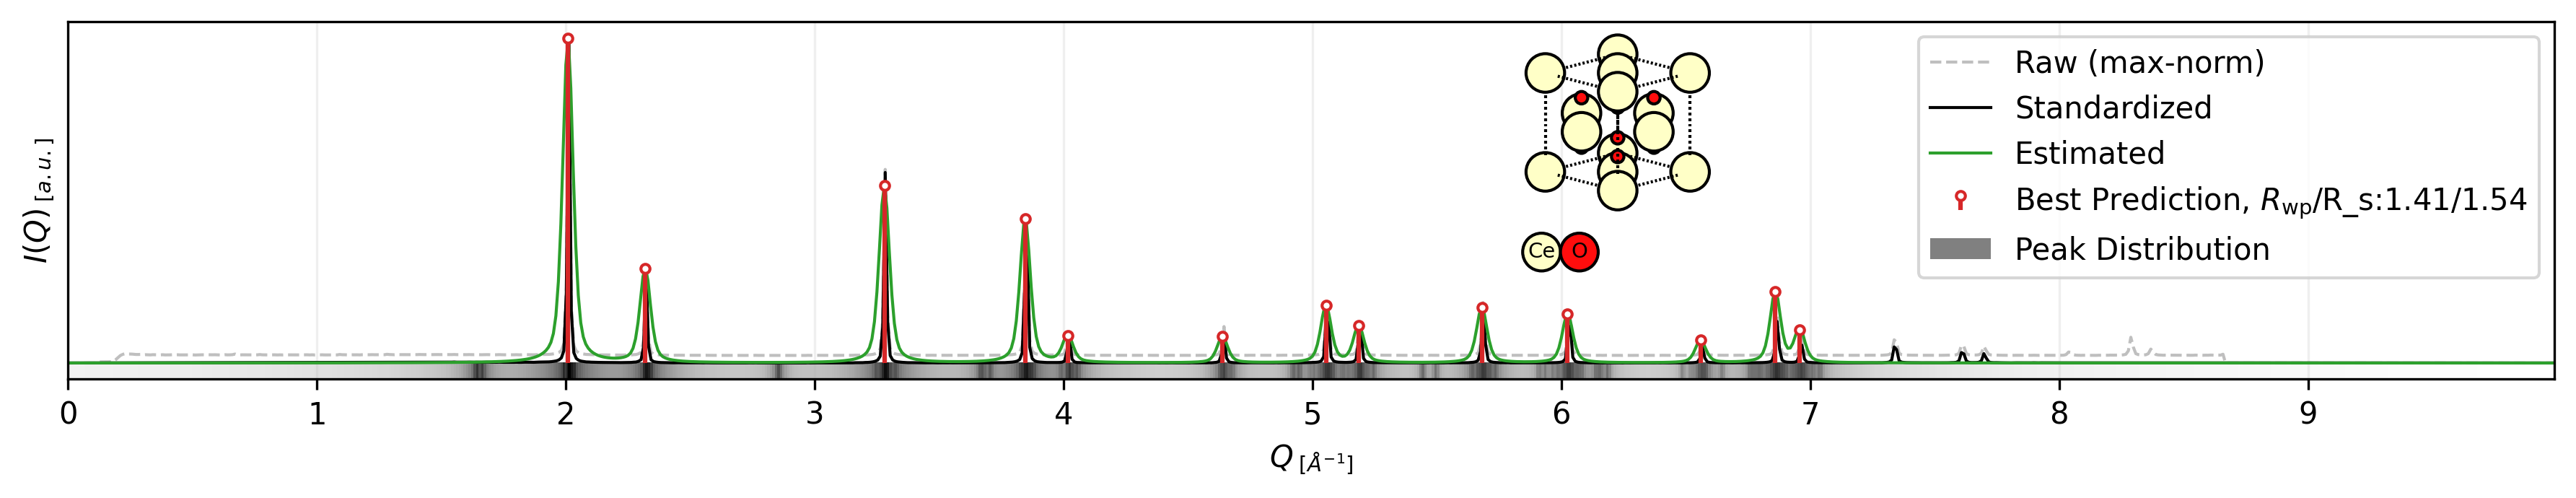

Data loaded from results_output/crystalline_CeO2_BM31_prt_crystallineCexOy.pkl


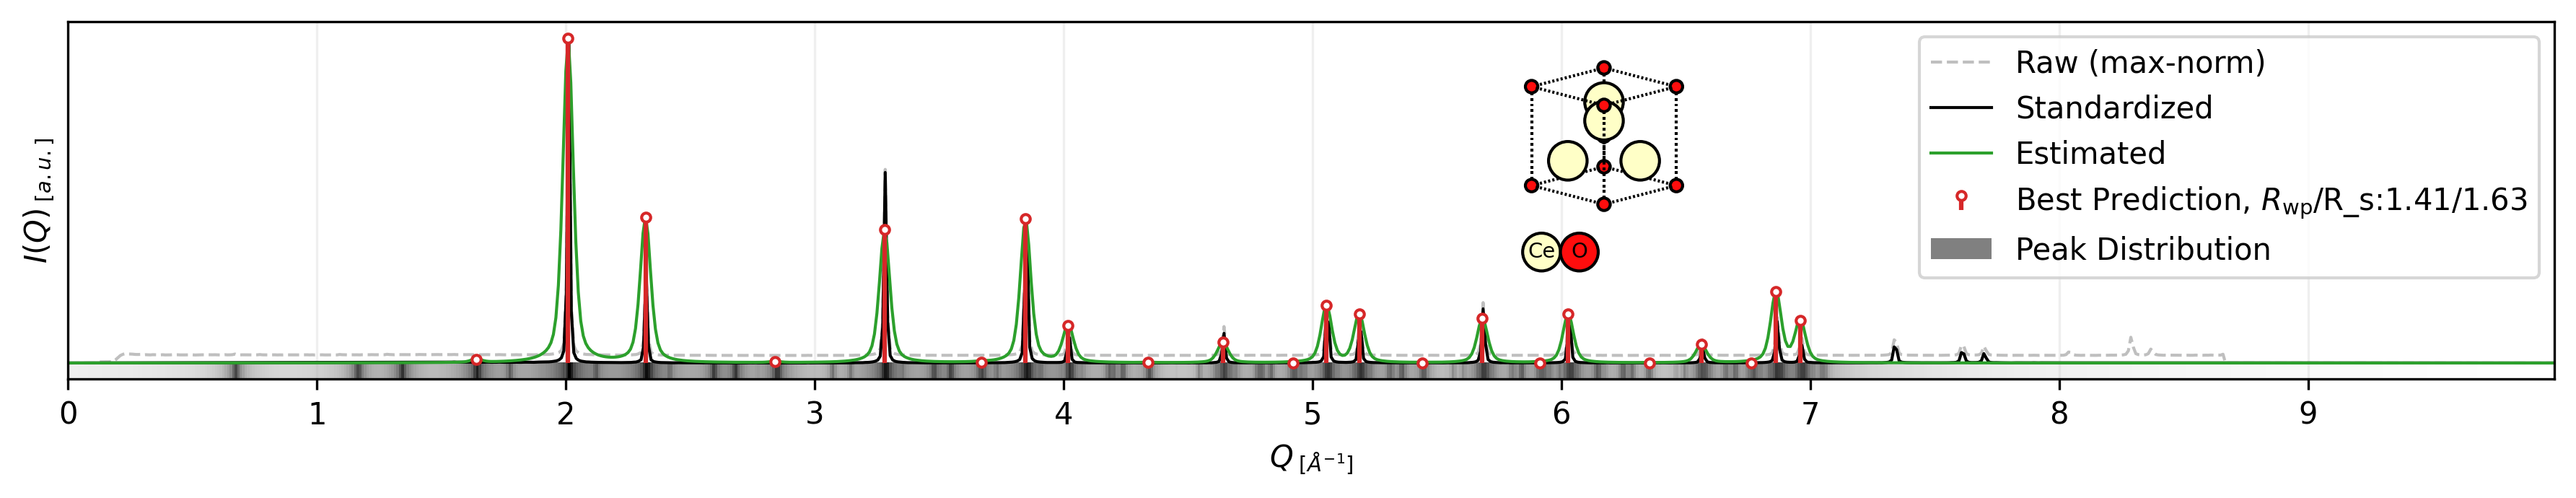

In [4]:
global_plotting_config = dict(
    size_estimate=10000,
    complexity_weight=0.01,
    atom_radii=0.5, 
    atom_offset=(0, 2, 0),
    atom_legend_radius=1.0,
    struc_offset_x=0.1,
    struc_offset_y=0.25,
    struc_scale_height=0.75,
    struc_axis_off=True,
    struc_add_axis_x = 6.0,
    figsize=(10*1.2,2*1.2),
    dpi=300,    
)

result_paths = sorted(glob(os.path.join(pipeline.data_output_folder, '*crystalline*.pkl'))) if pipeline.data_output_folder is not None else []

for path in result_paths:
    pipeline.load_pickle(path)
    pipeline.plot_pxrd_and_structure(**global_plotting_config)
    print(pipeline)

Data loaded from crystalline_Si/scan-4693_mean_protocol_Si1_cubic.pkl


Finding best structure...:   0%|                                                                  | 0/1 [00:00…

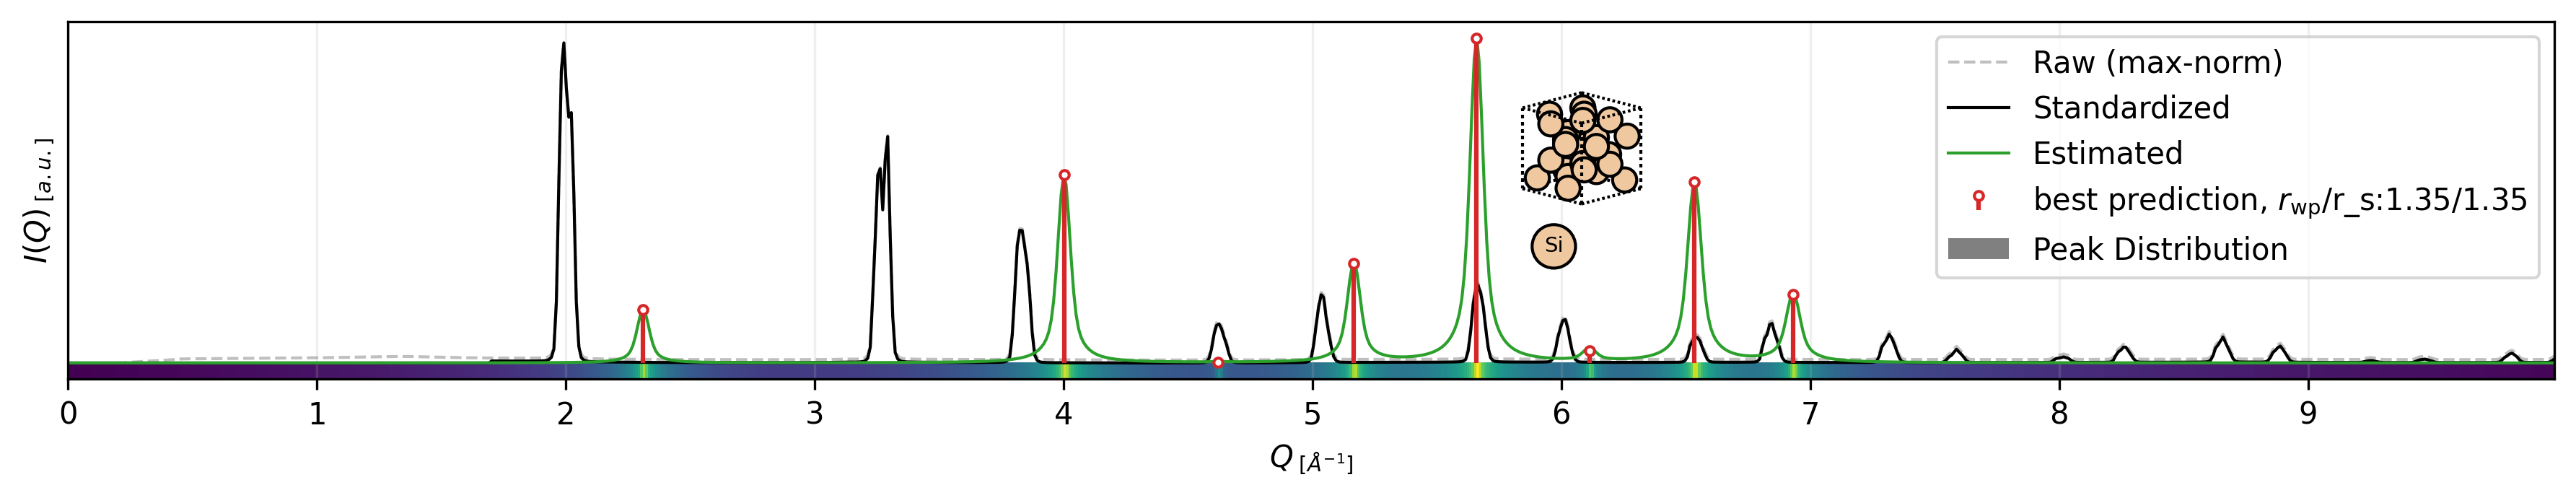

Data loaded from crystalline_Si/scan-4693_mean_protocol_Six.pkl


Finding best structure...:   0%|                                                                 | 0/25 [00:00…

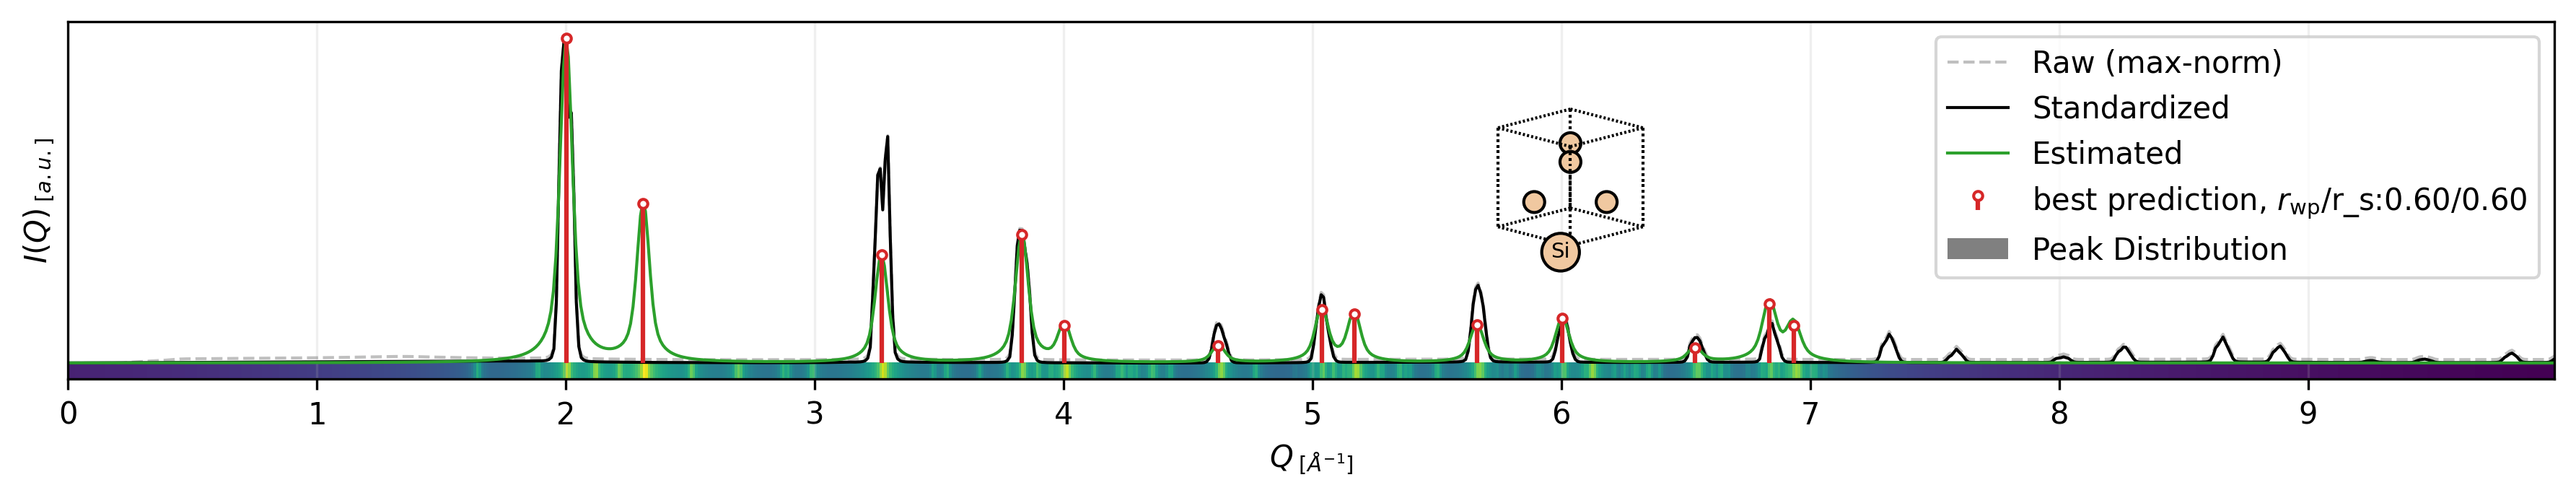

Data loaded from crystalline_Si/scan-4693_mean_protocol_Six_crystal.pkl


Finding best structure...:   0%|                                                                 | 0/25 [00:00…

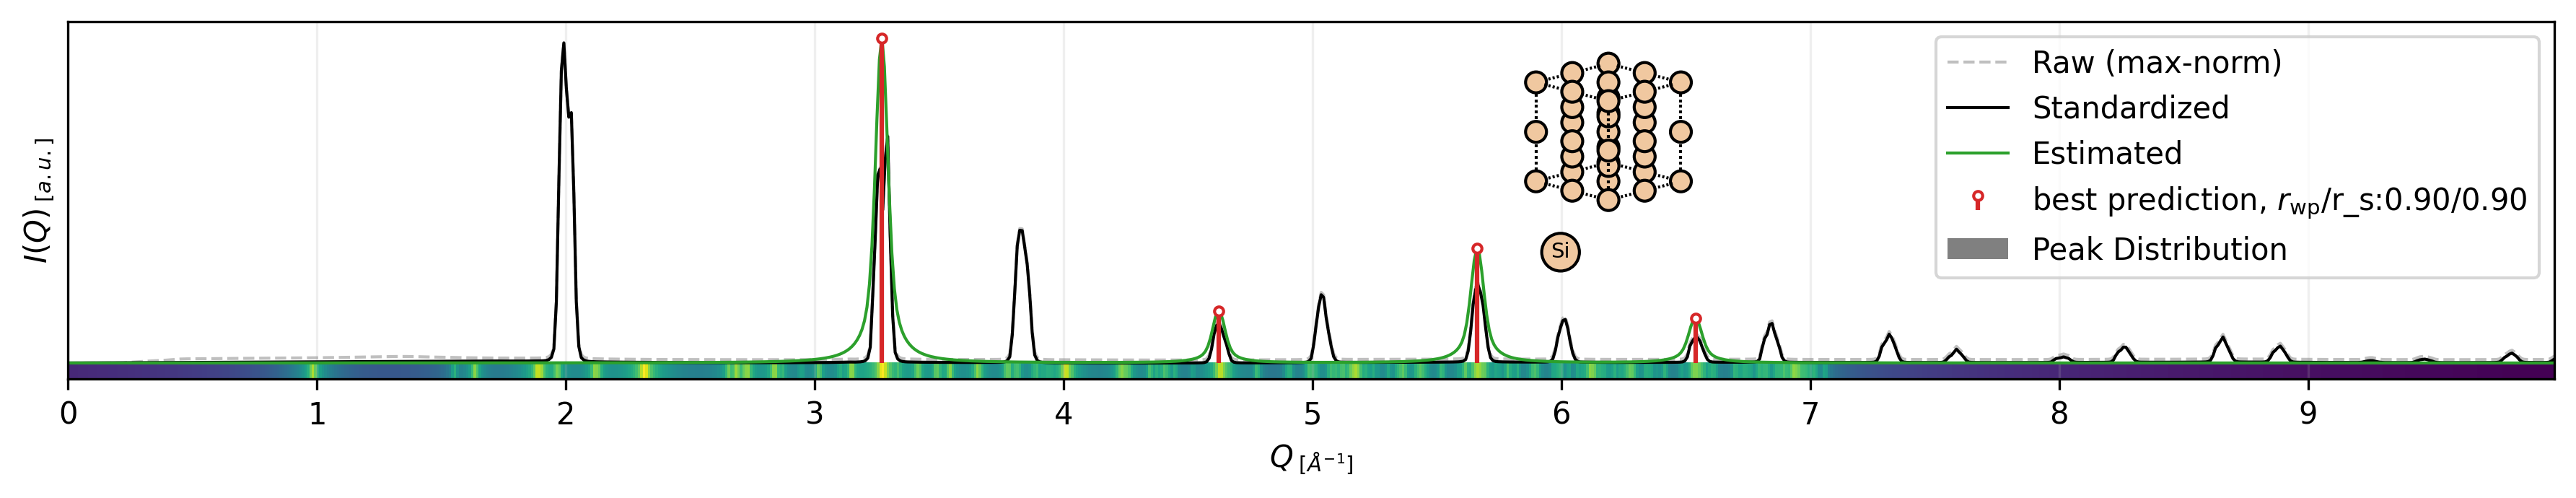

Data loaded from crystalline_Si/scan-4693_mean_protocol_Six_sg.pkl


Finding best structure...:   0%|                                                                 | 0/25 [00:00…

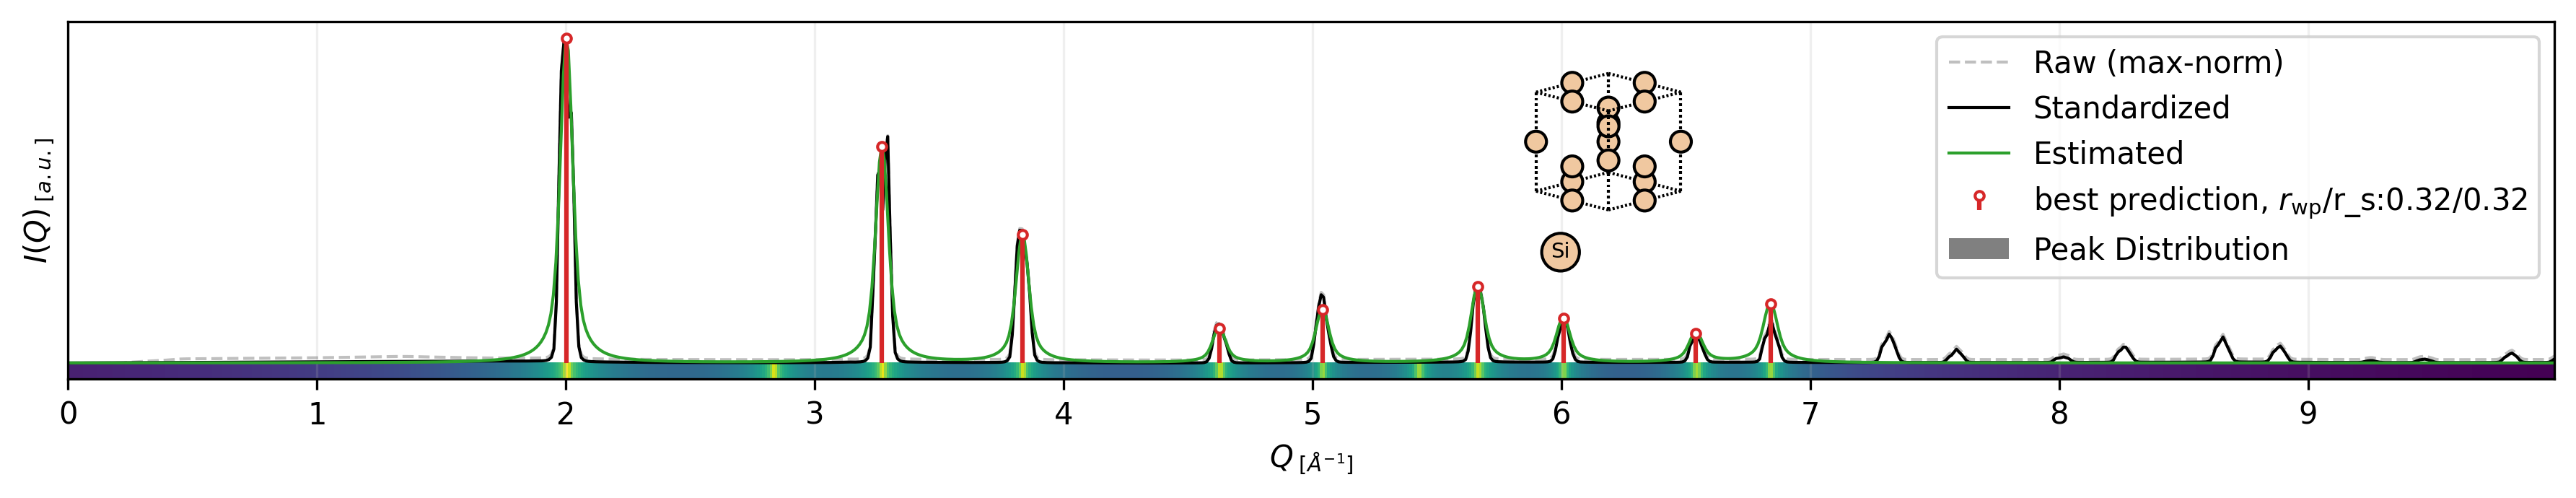

Data loaded from crystalline_Si/scan-4693_mean_protocol_none.pkl


Finding best structure...:   0%|                                                                 | 0/24 [00:00…

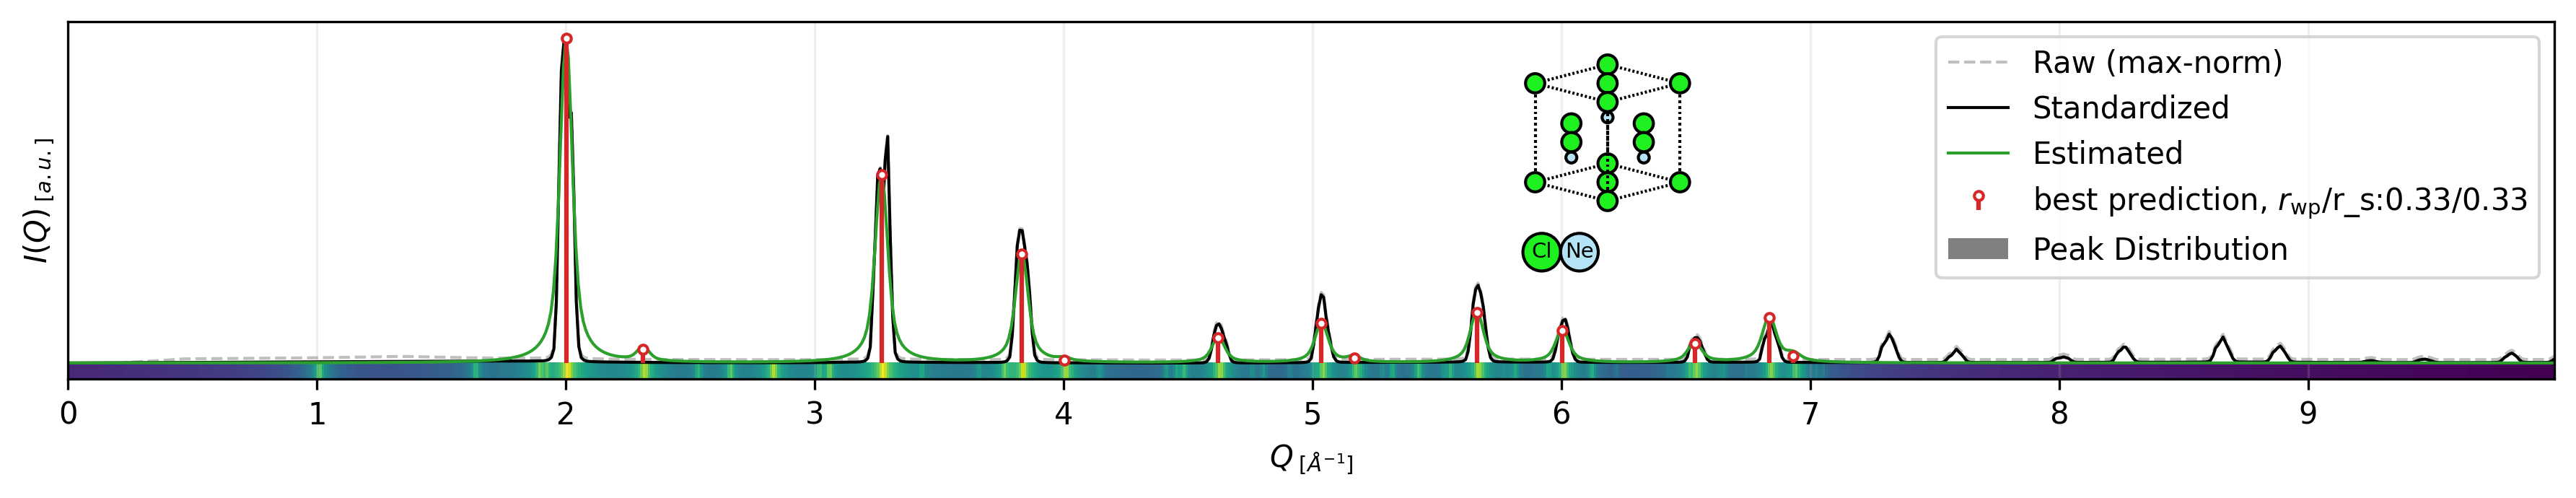

In [10]:
global_plotting_config = dict(
    size_estimate=100,
    complexity_weight=0.0,
    atom_radii=0.5, 
    atom_offset=(0, 2, 0),
    atom_legend_radius=1.0,
    struc_offset_x=0.1,
    struc_offset_y=0.25,
    struc_scale_height=0.75,
    struc_axis_off=True,
    struc_add_axis_x = 6.0,
    figsize=(10*1.2,2*1.2),
    dpi=300,    
)

result_paths = sorted(glob(os.path.join(pipeline.results_output_folder, '*.pkl'))) if pipeline.results_output_folder is not None else []

for path in result_paths:
    pipeline.load_pickle(path)
    pipeline.plot_pxrd_and_structure(**global_plotting_config)